In [3]:
# Import libraries necessary for this project
import pandas as pd
from pandas import DataFrame
import numpy as np
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler
#from mlxtend.preprocessing import minmax_scaling
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp
from scipy import *

In [4]:
!pip install  xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 3.4 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [5]:
# Load the dataset
train = pd.read_csv("prosperLoanData.csv")

In [6]:
train.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18                0.0   
1        0.0920       0.0820  ...            0.00                0.0   
2        0.2750       0.2400  ...          -24.20                0.0   
3        0.0974       0.0874  ...         -108.01                0.0   
4        0.2085       0.1985  ...          -60.27                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   

  InvestmentFromFriendsAmount Investors  
0                         0.0       258  
1                         0.0         1  
2                         0.0        41  
3                         0.0       158  
4                         0.0        20  

[5 rows x 81 columns]

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [8]:
train['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

The data has the highest value with 56576 current loan status and only 5 cancelled loan status

#Missing Value Treatment

In [9]:
missing_train_count=train.isnull().sum()
print(missing_train_count)

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64


In [10]:
train.duplicated().sum()

0

In [11]:
catigorical=train.select_dtypes(include=['bool','object'])
display(catigorical.head(10))

ListingKey            ListingCreationDate CreditGrade  \
0  1021339766868145413AB3B  2007-08-26 19:09:29.263000000           C   
1  10273602499503308B223C1  2014-02-27 08:28:07.900000000         NaN   
2  0EE9337825851032864889A  2007-01-05 15:00:47.090000000          HR   
3  0EF5356002482715299901A  2012-10-22 11:02:35.010000000         NaN   
4  0F023589499656230C5E3E2  2013-09-14 18:38:39.097000000         NaN   
5  0F05359734824199381F61D  2013-12-14 08:26:37.093000000         NaN   
6  0F0A3576754255009D63151  2013-04-12 09:52:56.147000000         NaN   
7  0F1035772717087366F9EA7  2013-05-05 06:49:27.493000000         NaN   
8  0F043596202561788EA13D5  2013-12-02 10:43:39.117000000         NaN   
9  0F043596202561788EA13D5  2013-12-02 10:43:39.117000000         NaN   

  LoanStatus           ClosedDate ProsperRating (Alpha) BorrowerState  \
0  Completed  2009-08-14 00:00:00                   NaN            CO   
1    Current                  NaN                     A            CO   
2  Completed  2009-12-17 00:00:00                   NaN            GA   
3    Current                  NaN                     A            GA   
4    Current                  NaN                     D            MN   
5    Current                  NaN                     B            NM   
6    Current                  NaN                     E            KS   
7    Current                  NaN                     C            CA   
8    Current                  NaN                    AA            IL   
9    Current                  NaN                    AA            IL   

       Occupation EmploymentStatus  IsBorrowerHomeowner  CurrentlyInGroup  \
0           Other    Self-employed                 True              True   
1    Professional         Employed                False             False   
2           Other    Not available                False              True   
3   Skilled Labor         Employed                 True             False   
4       Executive         Employed                 True             False   
5    Professional         Employed                 True             False   
6  Sales - Retail         Employed                False             False   
7         Laborer         Employed                False             False   
8    Food Service         Employed                 True             False   
9    Food Service         Employed                 True             False   

                  GroupKey               DateCreditPulled  \
0                      NaN  2007-08-26 18:41:46.780000000   
1                      NaN            2014-02-27 08:28:14   
2  783C3371218786870A73D20  2007-01-02 14:09:10.060000000   
3                      NaN            2012-10-22 11:02:32   
4                      NaN            2013-09-14 18:38:44   
5                      NaN            2013-12-14 08:26:40   
6                      NaN            2013-04-12 09:52:53   
7                      NaN            2013-05-05 06:49:25   
8                      NaN            2013-12-02 10:43:39   
9                      NaN            2013-12-02 10:43:39   

  FirstRecordedCreditLine     IncomeRange  IncomeVerifiable  \
0     2001-10-11 00:00:00  $25,000-49,999              True   
1     1996-03-18 00:00:00  $50,000-74,999              True   
2     2002-07-27 00:00:00   Not displayed              True   
3     1983-02-28 00:00:00  $25,000-49,999              True   
4     2004-02-20 00:00:00       $100,000+              True   
5     1973-03-01 00:00:00       $100,000+              True   
6     2000-09-29 00:00:00  $25,000-49,999              True   
7     1999-02-25 00:00:00  $25,000-49,999              True   
8     1993-04-01 00:00:00  $25,000-49,999              True   
9     1993-04-01 00:00:00  $25,000-49,999              True   

                   LoanKey  LoanOriginationDate LoanOriginationQuarter  \
0  E33A3400205839220442E84  2007-09-12 00:00:00                Q3 2007   
1  9E3B37071505919926B1D82  2014-03-03 00:00:0

In [12]:
catigorical.isna().sum()

ListingKey                      0
ListingCreationDate             0
CreditGrade                 84984
LoanStatus                      0
ClosedDate                  58848
ProsperRating (Alpha)       29084
BorrowerState                5515
Occupation                   3588
EmploymentStatus             2255
IsBorrowerHomeowner             0
CurrentlyInGroup                0
GroupKey                   100596
DateCreditPulled                0
FirstRecordedCreditLine       697
IncomeRange                     0
IncomeVerifiable                0
LoanKey                         0
LoanOriginationDate             0
LoanOriginationQuarter          0
MemberKey                       0
dtype: int64

In [13]:
catigorical1=catigorical.fillna("Unknown")
display(catigorical1.head(10))

ListingKey            ListingCreationDate CreditGrade  \
0  1021339766868145413AB3B  2007-08-26 19:09:29.263000000           C   
1  10273602499503308B223C1  2014-02-27 08:28:07.900000000     Unknown   
2  0EE9337825851032864889A  2007-01-05 15:00:47.090000000          HR   
3  0EF5356002482715299901A  2012-10-22 11:02:35.010000000     Unknown   
4  0F023589499656230C5E3E2  2013-09-14 18:38:39.097000000     Unknown   
5  0F05359734824199381F61D  2013-12-14 08:26:37.093000000     Unknown   
6  0F0A3576754255009D63151  2013-04-12 09:52:56.147000000     Unknown   
7  0F1035772717087366F9EA7  2013-05-05 06:49:27.493000000     Unknown   
8  0F043596202561788EA13D5  2013-12-02 10:43:39.117000000     Unknown   
9  0F043596202561788EA13D5  2013-12-02 10:43:39.117000000     Unknown   

  LoanStatus           ClosedDate ProsperRating (Alpha) BorrowerState  \
0  Completed  2009-08-14 00:00:00               Unknown            CO   
1    Current              Unknown                     A            CO   
2  Completed  2009-12-17 00:00:00               Unknown            GA   
3    Current              Unknown                     A            GA   
4    Current              Unknown                     D            MN   
5    Current              Unknown                     B            NM   
6    Current              Unknown                     E            KS   
7    Current              Unknown                     C            CA   
8    Current              Unknown                    AA            IL   
9    Current              Unknown                    AA            IL   

       Occupation EmploymentStatus  IsBorrowerHomeowner  CurrentlyInGroup  \
0           Other    Self-employed                 True              True   
1    Professional         Employed                False             False   
2           Other    Not available                False              True   
3   Skilled Labor         Employed                 True             False   
4       Executive         Employed                 True             False   
5    Professional         Employed                 True             False   
6  Sales - Retail         Employed                False             False   
7         Laborer         Employed                False             False   
8    Food Service         Employed                 True             False   
9    Food Service         Employed                 True             False   

                  GroupKey               DateCreditPulled  \
0                  Unknown  2007-08-26 18:41:46.780000000   
1                  Unknown            2014-02-27 08:28:14   
2  783C3371218786870A73D20  2007-01-02 14:09:10.060000000   
3                  Unknown            2012-10-22 11:02:32   
4                  Unknown            2013-09-14 18:38:44   
5                  Unknown            2013-12-14 08:26:40   
6                  Unknown            2013-04-12 09:52:53   
7                  Unknown            2013-05-05 06:49:25   
8                  Unknown            2013-12-02 10:43:39   
9                  Unknown            2013-12-02 10:43:39   

  FirstRecordedCreditLine     IncomeRange  IncomeVerifiable  \
0     2001-10-11 00:00:00  $25,000-49,999              True   
1     1996-03-18 00:00:00  $50,000-74,999              True   
2     2002-07-27 00:00:00   Not displayed              True   
3     1983-02-28 00:00:00  $25,000-49,999              True   
4     2004-02-20 00:00:00       $100,000+              True   
5     1973-03-01 00:00:00       $100,000+              True   
6     2000-09-29 00:00:00  $25,000-49,999              True   
7     1999-02-25 00:00:00  $25,000-49,999              True   
8     1993-04-01 00:00:00  $25,000-49,999              True   
9     1993-04-01 00:00:00  $25,000-49,999              True   

                   LoanKey  LoanOriginationDate LoanOriginationQuarter  \
0  E33A3400205839220442E84  2007-09-12 00:00:00                Q3 2007   
1  9E3B37071505919926B1D82  2014-03-03 00:00:0

In [14]:
catigorical1.isna().sum()

ListingKey                 0
ListingCreationDate        0
CreditGrade                0
LoanStatus                 0
ClosedDate                 0
ProsperRating (Alpha)      0
BorrowerState              0
Occupation                 0
EmploymentStatus           0
IsBorrowerHomeowner        0
CurrentlyInGroup           0
GroupKey                   0
DateCreditPulled           0
FirstRecordedCreditLine    0
IncomeRange                0
IncomeVerifiable           0
LoanKey                    0
LoanOriginationDate        0
LoanOriginationQuarter     0
MemberKey                  0
dtype: int64

In [15]:
numerical=train.select_dtypes("number")
display(numerical.head(10))

ListingNumber  Term  BorrowerAPR  BorrowerRate  LenderYield  \
0         193129    36      0.16516        0.1580       0.1380   
1        1209647    36      0.12016        0.0920       0.0820   
2          81716    36      0.28269        0.2750       0.2400   
3         658116    36      0.12528        0.0974       0.0874   
4         909464    36      0.24614        0.2085       0.1985   
5        1074836    60      0.15425        0.1314       0.1214   
6         750899    36      0.31032        0.2712       0.2612   
7         768193    36      0.23939        0.2019       0.1919   
8        1023355    36      0.07620        0.0629       0.0529   
9        1023355    36      0.07620        0.0629       0.0529   

   EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
0                      NaN            NaN              NaN   
1                  0.07960         0.0249          0.05470   
2                      NaN            NaN              NaN   
3                  0.08490         0.0249          0.06000   
4                  0.18316         0.0925          0.09066   
5                  0.11567         0.0449          0.07077   
6                  0.23820         0.1275          0.11070   
7                  0.17830         0.0799          0.09840   
8                  0.05221         0.0099          0.04231   
9                  0.05221         0.0099          0.04231   

   ProsperRating (numeric)  ProsperScore  ...  LP_ServiceFees  \
0                      NaN           NaN  ...         -133.18   
1                      6.0           7.0  ...            0.00   
2                      NaN           NaN  ...          -24.20   
3                      6.0           9.0  ...         -108.01   
4                      3.0           4.0  ...          -60.27   
5                      5.0          10.0  ...          -25.33   
6                      2.0           2.0  ...          -22.95   
7                      4.0           4.0  ...          -69.21   
8                      7.0           9.0  ...          -16.77   
9                      7.0          11.0  ...          -16.77   

   LP_CollectionFees  LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
0                0.0                    0.0                  0.0   
1                0.0                    0.0                  0.0   
2                0.0                    0.0                  0.0   
3                0.0                    0.0                  0.0   
4                0.0                    0.0                  0.0   
5                0.0                    0.0                  0.0   
6                0.0                    0.0                  0.0   
7                0.0                    0.0                  0.0   
8                0.0                    0.0                  0.0   
9                0.0                    0.0                  0.0   

   LP_NonPrincipalRecoverypayments  PercentFunded  Recommendations  \
0                              0.0            1.0                0   
1                              0.0            1.0                0   
2                              0.0            1.0                0   
3                              0.0            1.0                0   
4                              0.0            1.0                0   
5                              0.0            1.0                0   
6                              0.0            1.0                0   
7                              0.0            1.0                0   
8                              0.0            1.0                0   
9                              0.0            1.0                0   

   InvestmentFromFriendsCount  InvestmentFromFriendsAmount  Investors  
0                           0                          0.0        258  
1                           0                          0.0          1  
2                           0                          0.0         41  
3                           0                          0.0        158

In [16]:
pd.set_option('display.max_columns', None)
a=numerical.isna().sum()
a.head(n=30)

ListingNumber                      0
Term                               0
BorrowerAPR                       25
BorrowerRate                       0
LenderYield                        0
EstimatedEffectiveYield        29084
EstimatedLoss                  29084
EstimatedReturn                29084
ProsperRating (numeric)        29084
ProsperScore                   29084
ListingCategory (numeric)          0
EmploymentStatusDuration        7625
CreditScoreRangeLower            591
CreditScoreRangeUpper            591
CurrentCreditLines              7604
OpenCreditLines                 7604
TotalCreditLinespast7years       697
OpenRevolvingAccounts              0
OpenRevolvingMonthlyPayment        0
InquiriesLast6Months             697
TotalInquiries                  1159
CurrentDelinquencies             697
AmountDelinquent                7622
DelinquenciesLast7Years          990
PublicRecordsLast10Years         697
PublicRecordsLast12Months       7604
RevolvingCreditBalance          7604
B

In [17]:
numerical1=numerical.fillna(numerical.mode().iloc[0])
#numerical1=numerical.fillna(method ='bfill')
display(numerical1)

ListingNumber  Term  BorrowerAPR  BorrowerRate  LenderYield  \
0              193129    36      0.16516        0.1580       0.1380   
1             1209647    36      0.12016        0.0920       0.0820   
2               81716    36      0.28269        0.2750       0.2400   
3              658116    36      0.12528        0.0974       0.0874   
4              909464    36      0.24614        0.2085       0.1985   
...               ...   ...          ...           ...          ...   
113932         753087    36      0.22354        0.1864       0.1764   
113933         537216    36      0.13220        0.1110       0.1010   
113934        1069178    60      0.23984        0.2150       0.2050   
113935         539056    60      0.28408        0.2605       0.2505   
113936        1140093    36      0.13189        0.1039       0.0939   

        EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
0                       0.28960         0.1650          0.12460   
1                       0.07960         0.0249          0.05470   
2                       0.28960         0.1650          0.12460   
3                       0.08490         0.0249          0.06000   
4                       0.18316         0.0925          0.09066   
...                         ...            ...              ...   
113932                  0.16490         0.0699          0.09500   
113933                  0.10070         0.0200          0.08070   
113934                  0.18828         0.1025          0.08578   
113935                  0.24450         0.0850          0.15950   
113936                  0.09071         0.0299          0.06081   

        ProsperRating (numeric)  ProsperScore  ListingCategory (numeric)  \
0                           4.0           4.0                          0   
1                           6.0           7.0                          2   
2                           4.0           4.0                          0   
3                           6.0           9.0                         16   
4                           3.0           4.0                          2   
...                         ...           ...                        ...   
113932                      4.0           5.0                          1   
113933                      6.0           8.0                          7   
113934                      3.0           3.0                          1   
113935                      4.0           5.0                          2   
113936                      6.0           7.0                          1   

        EmploymentStatusDuration  CreditScoreRangeLower  \
0                            2.0                  640.0   
1                           44.0                  680.0   
2                            0.0                  480.0   
3                          113.0                  800.0   
4                           44.0                  680.0   
...                          ...                    ...   
113932                     246.0                  700.0   
113933                      21.0                  700.0   
113934                      84.0                  700.0   
113935                      94.0                  680.0   
113936                     244.0                  680.0   

        CreditScoreRangeUpper  CurrentCreditLines  OpenCreditLines  \
0                       659.0                 5.0              4.0   
1                       699.0                14.0             14.0   
2                       499.0                 8.0              7.0   
3                       819.0                 5.0              5.0   
4                       699.0                19.0             19.0   
...                       ...                 ...              ...   
113932                  719.0                 9.0              9.0   
113933                  719.0                14.0             13.0   
113934                  719.0                12.0             12.0   
113935                  699.

In [18]:
pd.set_option('display.max_columns', None)
b=numerical1.isna().sum()
b.head(60)

ListingNumber                          0
Term                                   0
BorrowerAPR                            0
BorrowerRate                           0
LenderYield                            0
EstimatedEffectiveYield                0
EstimatedLoss                          0
EstimatedReturn                        0
ProsperRating (numeric)                0
ProsperScore                           0
ListingCategory (numeric)              0
EmploymentStatusDuration               0
CreditScoreRangeLower                  0
CreditScoreRangeUpper                  0
CurrentCreditLines                     0
OpenCreditLines                        0
TotalCreditLinespast7years             0
OpenRevolvingAccounts                  0
OpenRevolvingMonthlyPayment            0
InquiriesLast6Months                   0
TotalInquiries                         0
CurrentDelinquencies                   0
AmountDelinquent                       0
DelinquenciesLast7Years                0
PublicRecordsLas

In [19]:
new_train = pd.concat([numerical1,catigorical1], axis=1, join='inner')
display(new_train.head(5))

ListingNumber  Term  BorrowerAPR  BorrowerRate  LenderYield  \
0         193129    36      0.16516        0.1580       0.1380   
1        1209647    36      0.12016        0.0920       0.0820   
2          81716    36      0.28269        0.2750       0.2400   
3         658116    36      0.12528        0.0974       0.0874   
4         909464    36      0.24614        0.2085       0.1985   

   EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
0                  0.28960         0.1650          0.12460   
1                  0.07960         0.0249          0.05470   
2                  0.28960         0.1650          0.12460   
3                  0.08490         0.0249          0.06000   
4                  0.18316         0.0925          0.09066   

   ProsperRating (numeric)  ProsperScore  ListingCategory (numeric)  \
0                      4.0           4.0                          0   
1                      6.0           7.0                          2   
2                      4.0           4.0                          0   
3                      6.0           9.0                         16   
4                      3.0           4.0                          2   

   EmploymentStatusDuration  CreditScoreRangeLower  CreditScoreRangeUpper  \
0                       2.0                  640.0                  659.0   
1                      44.0                  680.0                  699.0   
2                       0.0                  480.0                  499.0   
3                     113.0                  800.0                  819.0   
4                      44.0                  680.0                  699.0   

   CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  \
0                 5.0              4.0                        12.0   
1                14.0             14.0                        29.0   
2                 8.0              7.0                         3.0   
3                 5.0              5.0                        29.0   
4                19.0             19.0                        49.0   

   OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  InquiriesLast6Months  \
0                      1                         24.0                   3.0   
1                     13                        389.0                   3.0   
2                      0                          0.0                   0.0   
3                      7                        115.0                   0.0   
4                      6                        220.0                   1.0   

   TotalInquiries  CurrentDelinquencies  AmountDelinquent  \
0             3.0                   2.0             472.0   
1             5.0                   0.0               0.0   
2             1.0                   1.0               0.0   
3             1.0                   4.0           10056.0   
4             9.0                   0.0               0.0   

   DelinquenciesLast7Years  PublicRecordsLast10Years  \
0                      4.0                       0.0   
1                      0.0                       1.0   
2                      0.0                       0.0   
3                     14.0                       0.0   
4                      0.0                       0.0   

   PublicRecordsLast12Months  RevolvingCreditBalance  BankcardUtilization  \
0                        0.0                     0.0                 0.00   
1                        0.0                  3989.0                 0.21   
2                        0.0                     0.0                 0.00   
3                        0.0                  1444.0                 0.04   
4                        0.0                  6193.0                 0.81   

   AvailableBankcardCredit  TotalTrades  TradesNeverDelinquent (percentage)  \
0                   1500.0         11.0                                0.81   
1                  10266.0         29.0                                1.00   
2                      0.0         17.0    

In [20]:
#new_train=train.dropna(axis=1)
display(new_train.head(n=5))
missing_train_count1=new_train.isnull().sum()
print(missing_train_count1)

ListingNumber  Term  BorrowerAPR  BorrowerRate  LenderYield  \
0         193129    36      0.16516        0.1580       0.1380   
1        1209647    36      0.12016        0.0920       0.0820   
2          81716    36      0.28269        0.2750       0.2400   
3         658116    36      0.12528        0.0974       0.0874   
4         909464    36      0.24614        0.2085       0.1985   

   EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
0                  0.28960         0.1650          0.12460   
1                  0.07960         0.0249          0.05470   
2                  0.28960         0.1650          0.12460   
3                  0.08490         0.0249          0.06000   
4                  0.18316         0.0925          0.09066   

   ProsperRating (numeric)  ProsperScore  ListingCategory (numeric)  \
0                      4.0           4.0                          0   
1                      6.0           7.0                          2   
2                      4.0           4.0                          0   
3                      6.0           9.0                         16   
4                      3.0           4.0                          2   

   EmploymentStatusDuration  CreditScoreRangeLower  CreditScoreRangeUpper  \
0                       2.0                  640.0                  659.0   
1                      44.0                  680.0                  699.0   
2                       0.0                  480.0                  499.0   
3                     113.0                  800.0                  819.0   
4                      44.0                  680.0                  699.0   

   CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  \
0                 5.0              4.0                        12.0   
1                14.0             14.0                        29.0   
2                 8.0              7.0                         3.0   
3                 5.0              5.0                        29.0   
4                19.0             19.0                        49.0   

   OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  InquiriesLast6Months  \
0                      1                         24.0                   3.0   
1                     13                        389.0                   3.0   
2                      0                          0.0                   0.0   
3                      7                        115.0                   0.0   
4                      6                        220.0                   1.0   

   TotalInquiries  CurrentDelinquencies  AmountDelinquent  \
0             3.0                   2.0             472.0   
1             5.0                   0.0               0.0   
2             1.0                   1.0               0.0   
3             1.0                   4.0           10056.0   
4             9.0                   0.0               0.0   

   DelinquenciesLast7Years  PublicRecordsLast10Years  \
0                      4.0                       0.0   
1                      0.0                       1.0   
2                      0.0                       0.0   
3                     14.0                       0.0   
4                      0.0                       0.0   

   PublicRecordsLast12Months  RevolvingCreditBalance  BankcardUtilization  \
0                        0.0                     0.0                 0.00   
1                        0.0                  3989.0                 0.21   
2                        0.0                     0.0                 0.00   
3                        0.0                  1444.0                 0.04   
4                        0.0                  6193.0                 0.81   

   AvailableBankcardCredit  TotalTrades  TradesNeverDelinquent (percentage)  \
0                   1500.0         11.0                                0.81   
1                  10266.0         29.0                                1.00   
2                      0.0         17.0    

ListingNumber             0
Term                      0
BorrowerAPR               0
BorrowerRate              0
LenderYield               0
                         ..
IncomeVerifiable          0
LoanKey                   0
LoanOriginationDate       0
LoanOriginationQuarter    0
MemberKey                 0
Length: 81, dtype: int64


# Feature Engineering

In [21]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingNumber                        113937 non-null  int64  
 1   Term                                 113937 non-null  int64  
 2   BorrowerAPR                          113937 non-null  float64
 3   BorrowerRate                         113937 non-null  float64
 4   LenderYield                          113937 non-null  float64
 5   EstimatedEffectiveYield              113937 non-null  float64
 6   EstimatedLoss                        113937 non-null  float64
 7   EstimatedReturn                      113937 non-null  float64
 8   ProsperRating (numeric)              113937 non-null  float64
 9   ProsperScore                         113937 non-null  float64
 10  ListingCategory (numeric)            113937 non-null  int64  
 11  EmploymentSta

In [22]:
new_train.nunique()

ListingNumber             113066
Term                           3
BorrowerAPR                 6677
BorrowerRate                2294
LenderYield                 2283
                           ...  
IncomeVerifiable               2
LoanKey                   113066
LoanOriginationDate         1873
LoanOriginationQuarter        33
MemberKey                  90831
Length: 81, dtype: int64

In [23]:
new_train.describe()

ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113937.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218858       0.192764   
std     3.280762e+05      10.436212       0.080382       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209790       0.184000   
75%     8.926340e+05      36.000000       0.283860       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000            113937.000000  113937.000000    113937.000000   
mean        0.182701                 0.199533       0.101925         0.103351   
std         0.074516                 0.079194       0.054701         0.029037   
min        -0.010000                -0.182700       0.004900        -0.182700   
25%         0.124200                 0.132600       0.054900         0.080220   
50%         0.173000                 0.195710       0.099000         0.109300   
75%         0.240000                 0.289600       0.165000         0.124600   
max         0.492500                 0.319900       0.366000         0.283700   

       ProsperRating (numeric)   ProsperScore  ListingCategory (numeric)  \
count            113937.000000  113937.000000              113937.000000   
mean                  4.053802       5.452285                   2.774209   
std                   1.444304       2.220136                   3.996797   
min                   1.000000       1.000000                   0.000000   
25%                   3.000000       4.000000                   1.000000   
50%                   4.000000       5.000000                   1.000000   
75%                   5.000000       7.000000                   3.000000   
max                   7.000000      11.000000                  20.000000   

       EmploymentStatusDuration  CreditScoreRangeLower  CreditScoreRangeUpper  \
count             113937.000000          113937.000000          113937.000000   
mean                  89.642188             685.538850             704.538850   
std                   94.369148              66.286893              66.286893   
min                    0.000000               0.000000              19.000000   
25%                   19.000000             660.000000             679.000000   
50%                   60.000000             680.000000             699.000000   
75%                  130.000000             720.000000             739.000000   
max                  755.000000             880.000000             899.000000   

       CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  \
count       113937.000000    113937.000000               113937.000000   
mean            10.162546         9.109324                   26.719336   
std              5.304214         4.884824                   13.603494   
min              0.000000         0.000000                    2.000000   
25%              7.000000         6.000000                   17.000000   
50%              9.000000         8.000000                   25.000000   
75%             13.000000        12.000000                   35.000000   
max             59.000000        54.000000                  136.000000   

       OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  \
count           113937.00000                113937.000000   
mean                 6.96979                   398.292161   
std                  4.63097                   447.159711   
min                  0.00000                     0.000000   
25%                  4.00000                   114.000000   
50%                  6.00000                   271.000000   
75%                  9.00000                   525.000000   
max                 51.00000                 14985.000000   

       InquiriesLast6Mo

In [24]:
print('Skew: %f' % new_train['BorrowerRate'].skew())

Skew: 0.275994


we note that :
*in Borrower Rate* :Little Deviate from the normal distribution Have appreciable positive skewness.Show peakedness.
*in Loan Status*:Deviate from the normal distribution Have appreciable right skewness.Show peakedness.


##**Data Visualizations**

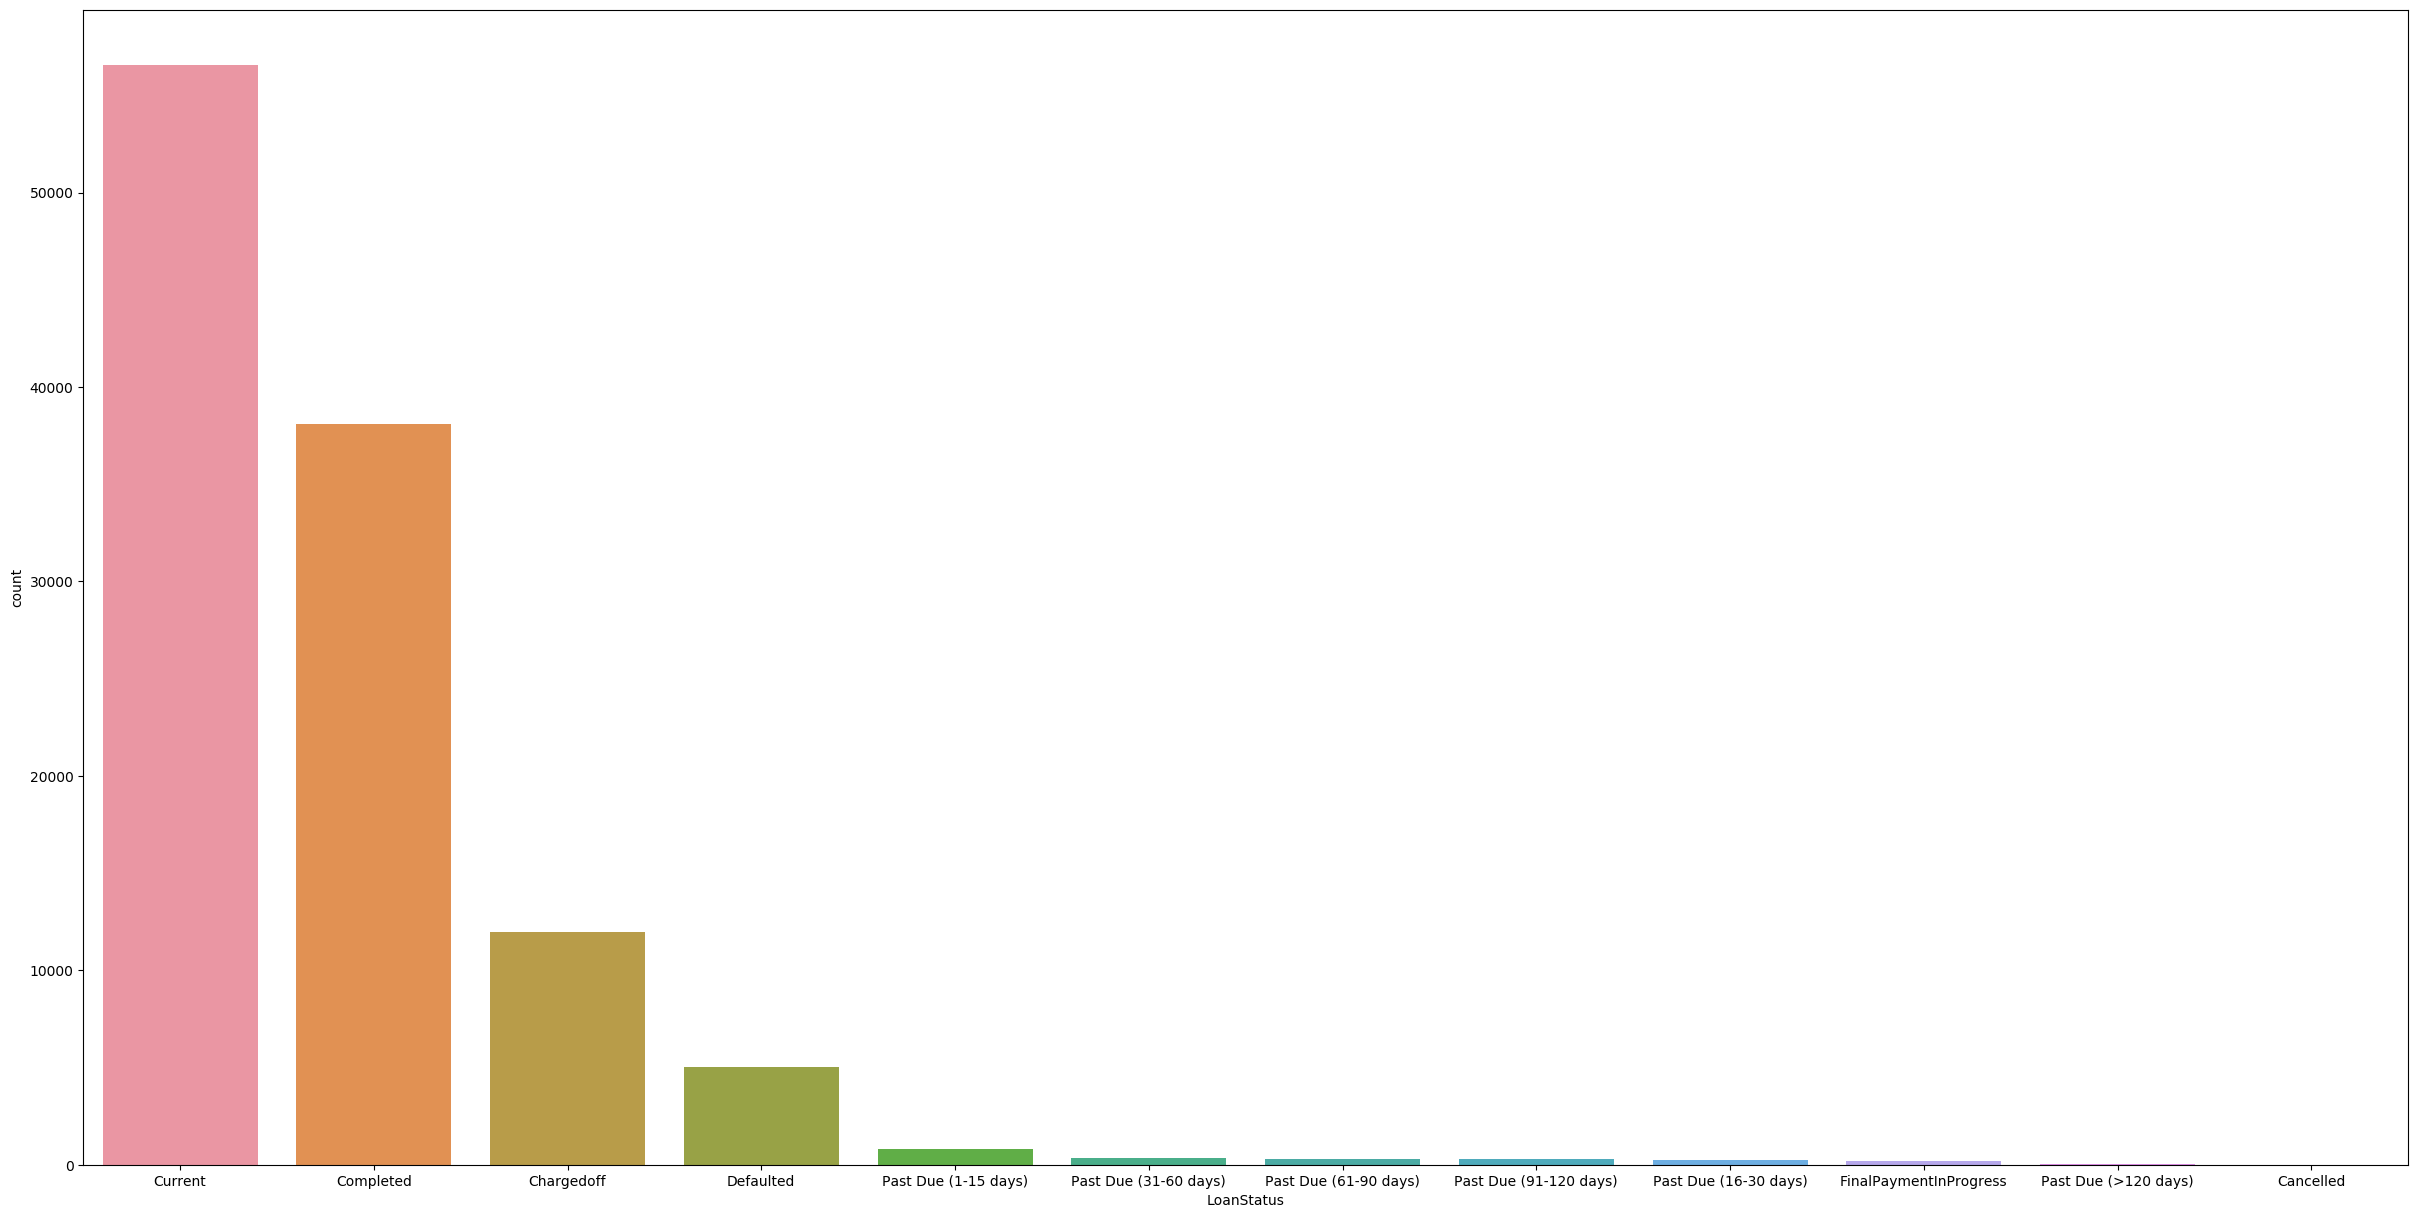

In [25]:
plt.figure(figsize = (30,15))
sns.countplot(new_train.LoanStatus.dropna(), order = new_train.LoanStatus.value_counts().index);

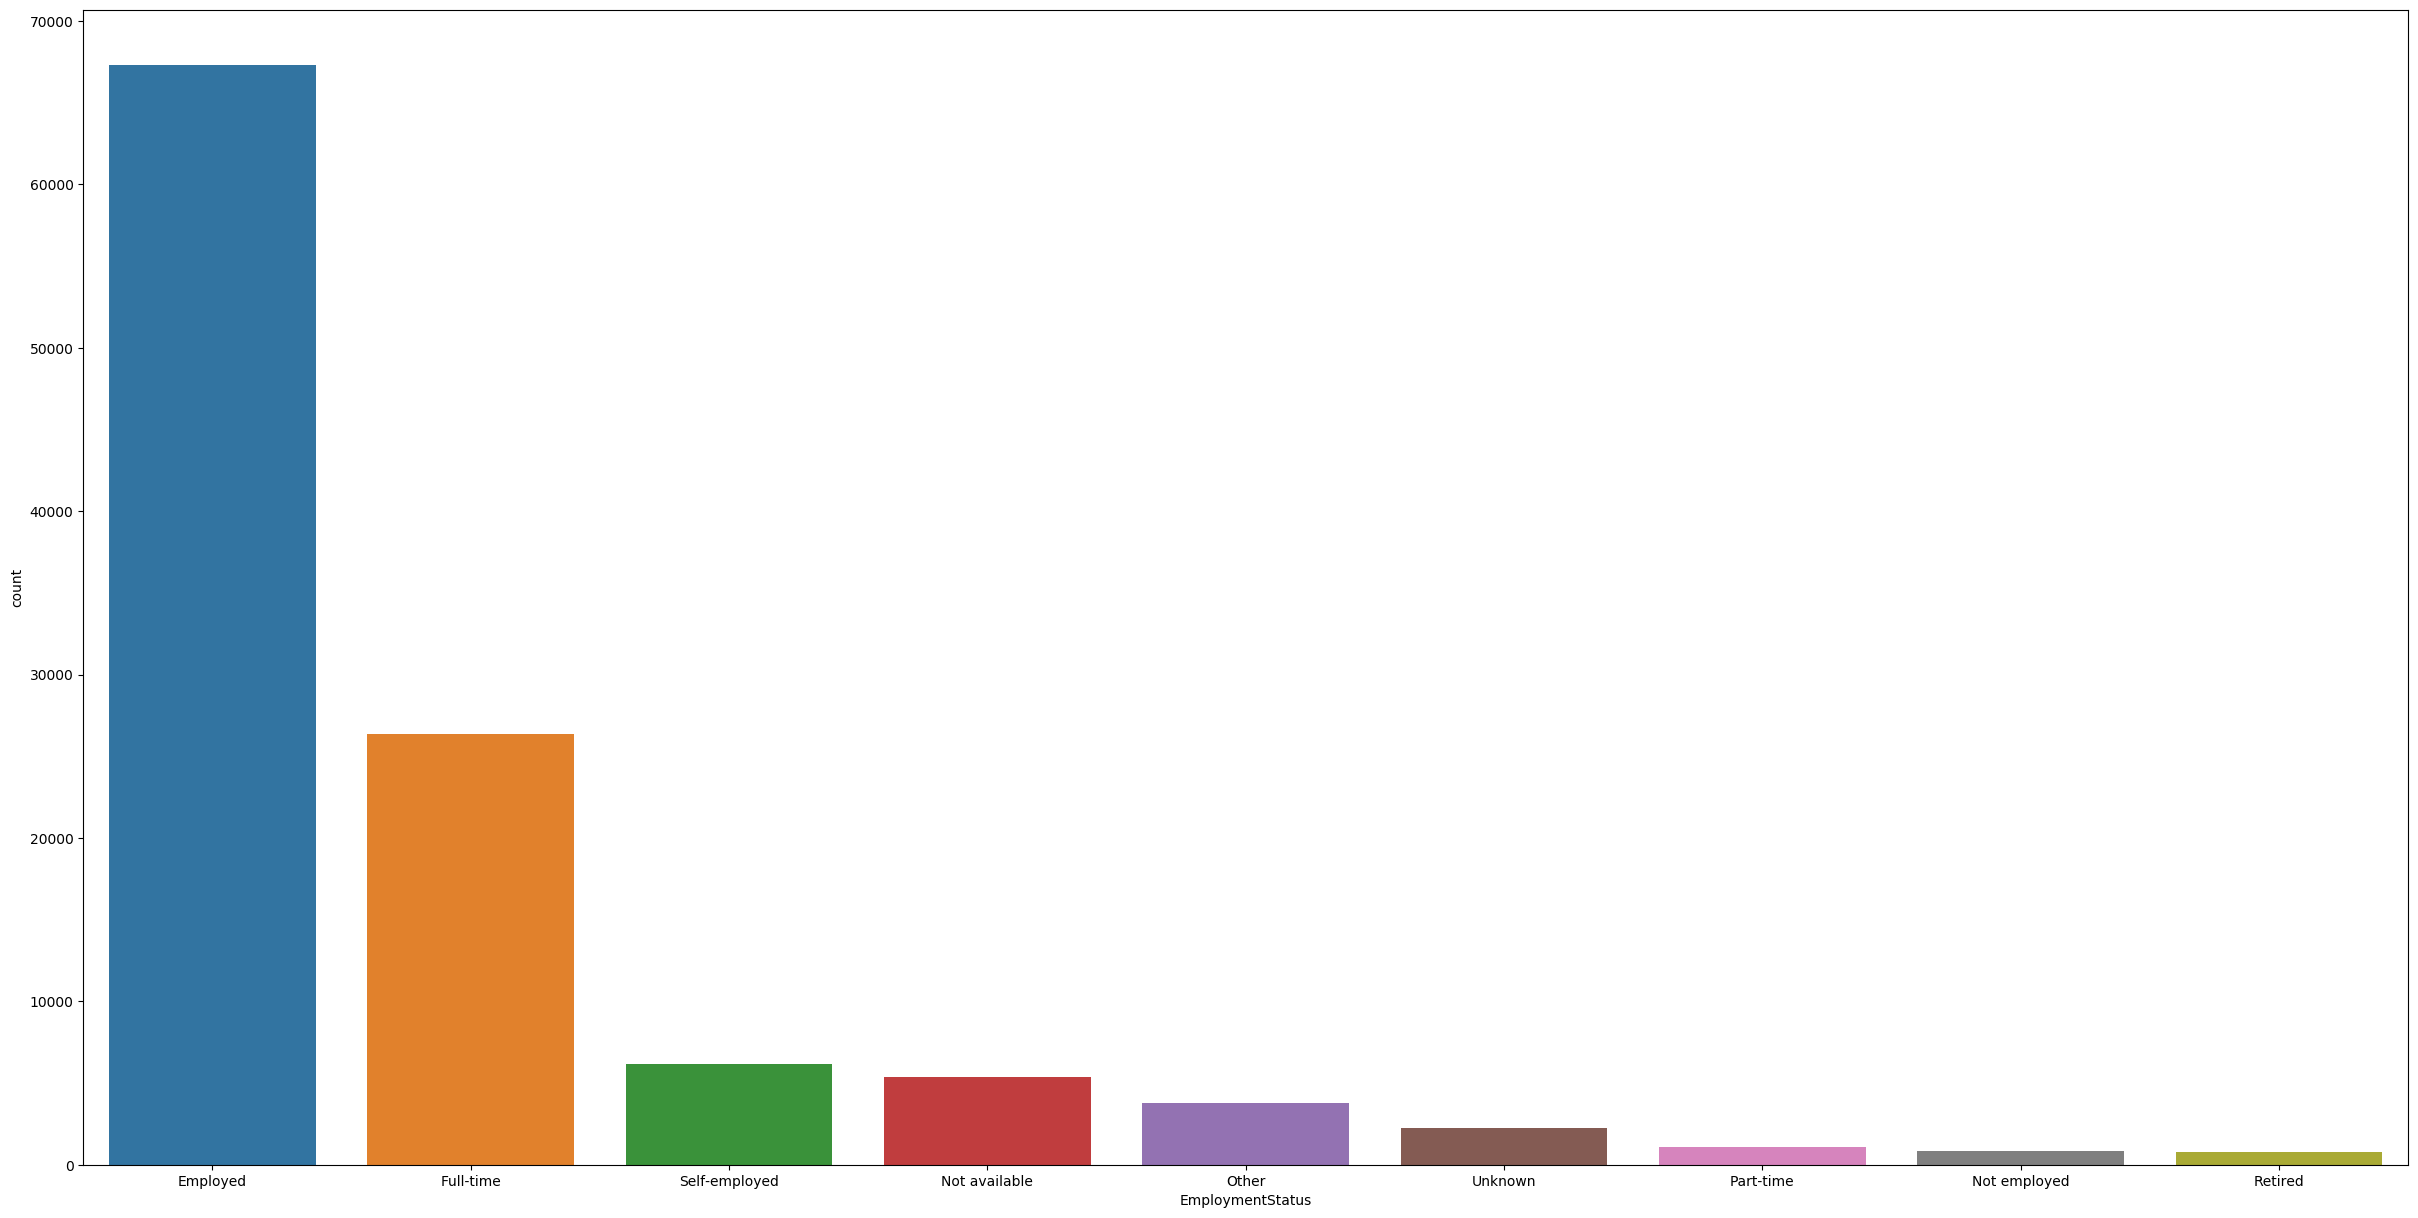

In [26]:
plt.figure(figsize = (30,15))
sns.countplot(new_train.EmploymentStatus.dropna(), order = new_train.EmploymentStatus.value_counts().index);

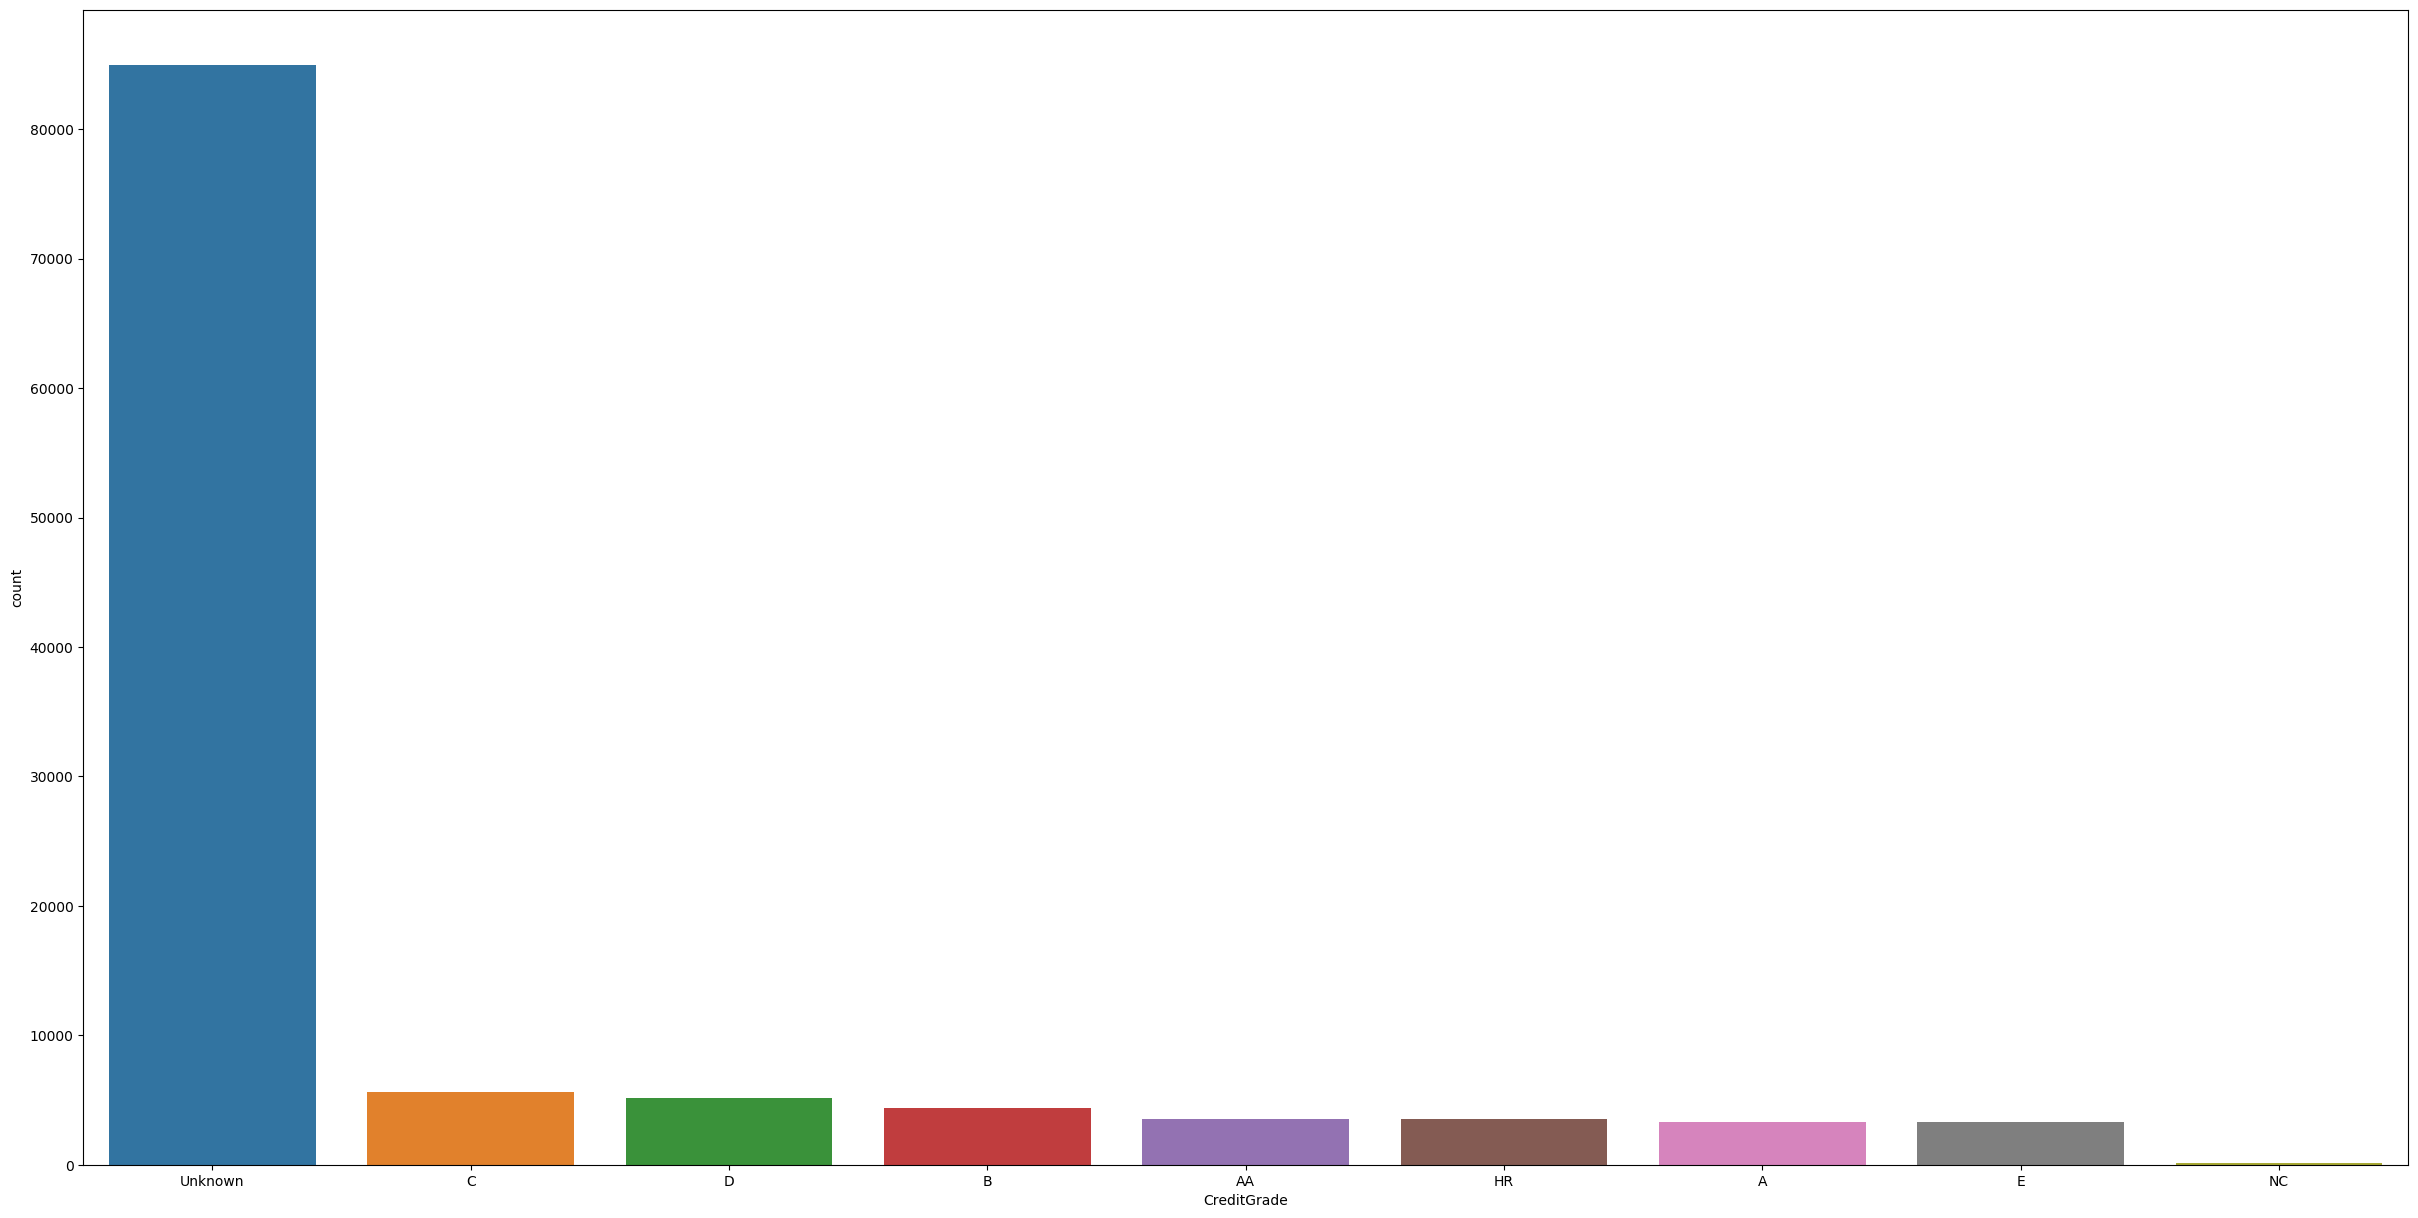

In [27]:
plt.figure(figsize = (30,15))
sns.countplot(new_train.CreditGrade.dropna(), order = new_train.CreditGrade.value_counts().index);

There are so much high credit grade such as unknown it does lead to higher amount of deliquency. Because most number of loan status is current.



(array([6.3000e+01, 1.1966e+04, 2.5660e+04, 2.6902e+04, 1.8819e+04,
        1.7516e+04, 1.0953e+04, 2.0500e+03, 2.0000e+00, 6.0000e+00]),
 array([0.     , 0.04975, 0.0995 , 0.14925, 0.199  , 0.24875, 0.2985 ,
        0.34825, 0.398  , 0.44775, 0.4975 ]),
 <a list of 10 Patch objects>)

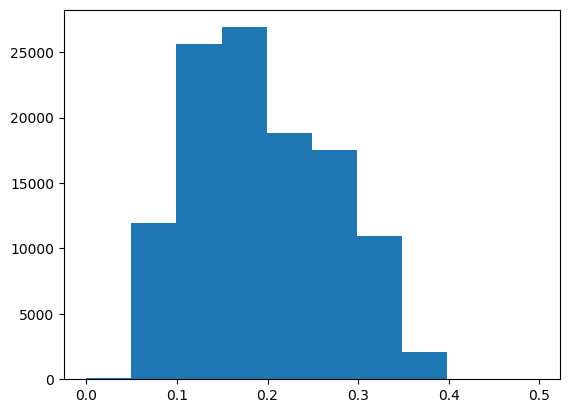

In [28]:
plt.hist(new_train["BorrowerRate"])

Highest number of borrower rate is between 0.1 and 0.2.



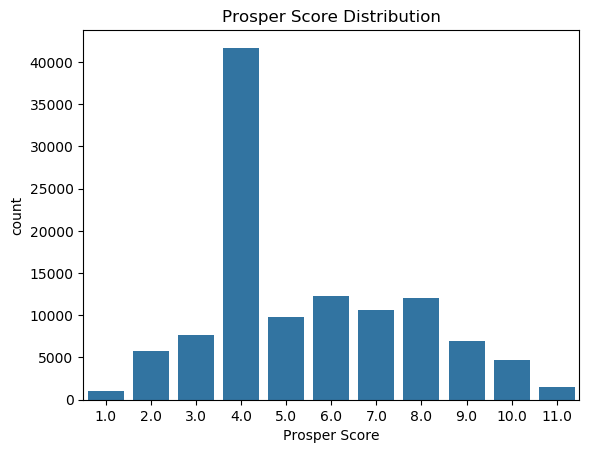

In [29]:
base_color = sns.color_palette()[0]
sns.countplot(data=new_train,x= 'ProsperScore',color=base_color)
plt.title('Prosper Score Distribution')
plt.xlabel('Prosper Score');

The highest prosper score is 4.0	

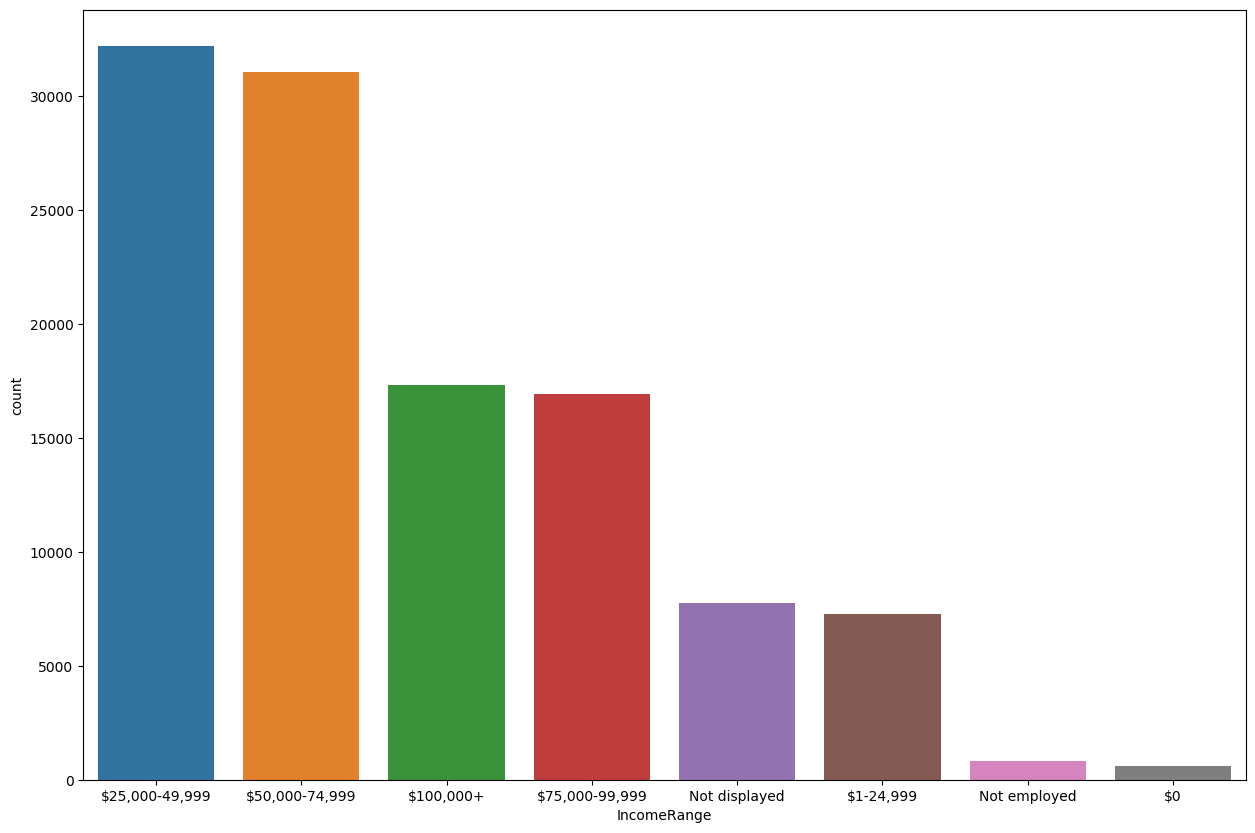

In [30]:
plt.figure(figsize = (15,10))
sns.countplot(new_train.IncomeRange.dropna(), order = new_train.IncomeRange.value_counts().index);

<function matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)>

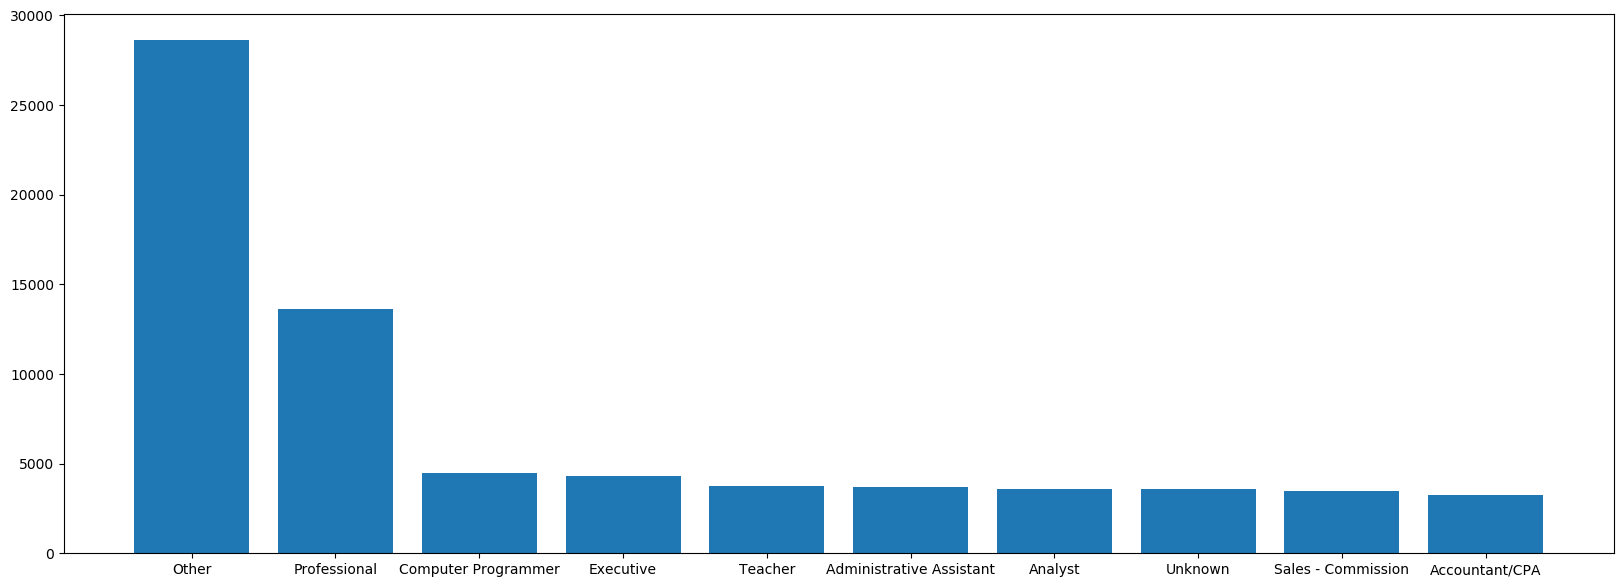

In [31]:
plt.figure(figsize=(20,7))
plt.bar(list(new_train['Occupation'].value_counts()[0:10].keys()),list(new_train['Occupation'].value_counts()[0:10]))
plt.bar

From this bar graph we see that loan is given to most of the people with credit grade unknown who are employed and occupation others then professional and computer programmer respectively. And most of the people have income range in between $25,000-49,999.



(array([1.4700e+02, 1.2390e+04, 2.6436e+04, 2.7063e+04, 1.9921e+04,
        1.5778e+04, 1.2169e+04, 2.5000e+01, 5.0000e+00, 3.0000e+00]),
 array([-0.01   ,  0.04025,  0.0905 ,  0.14075,  0.191  ,  0.24125,
         0.2915 ,  0.34175,  0.392  ,  0.44225,  0.4925 ]),
 <a list of 10 Patch objects>)

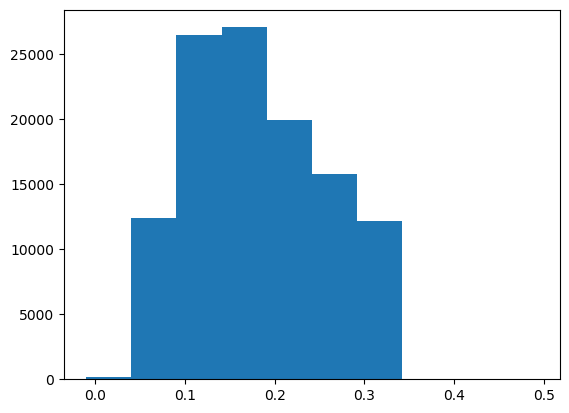

In [32]:
plt.hist(new_train["LenderYield"])

Highest number of Lender yeild between 0.1 and 0.2.

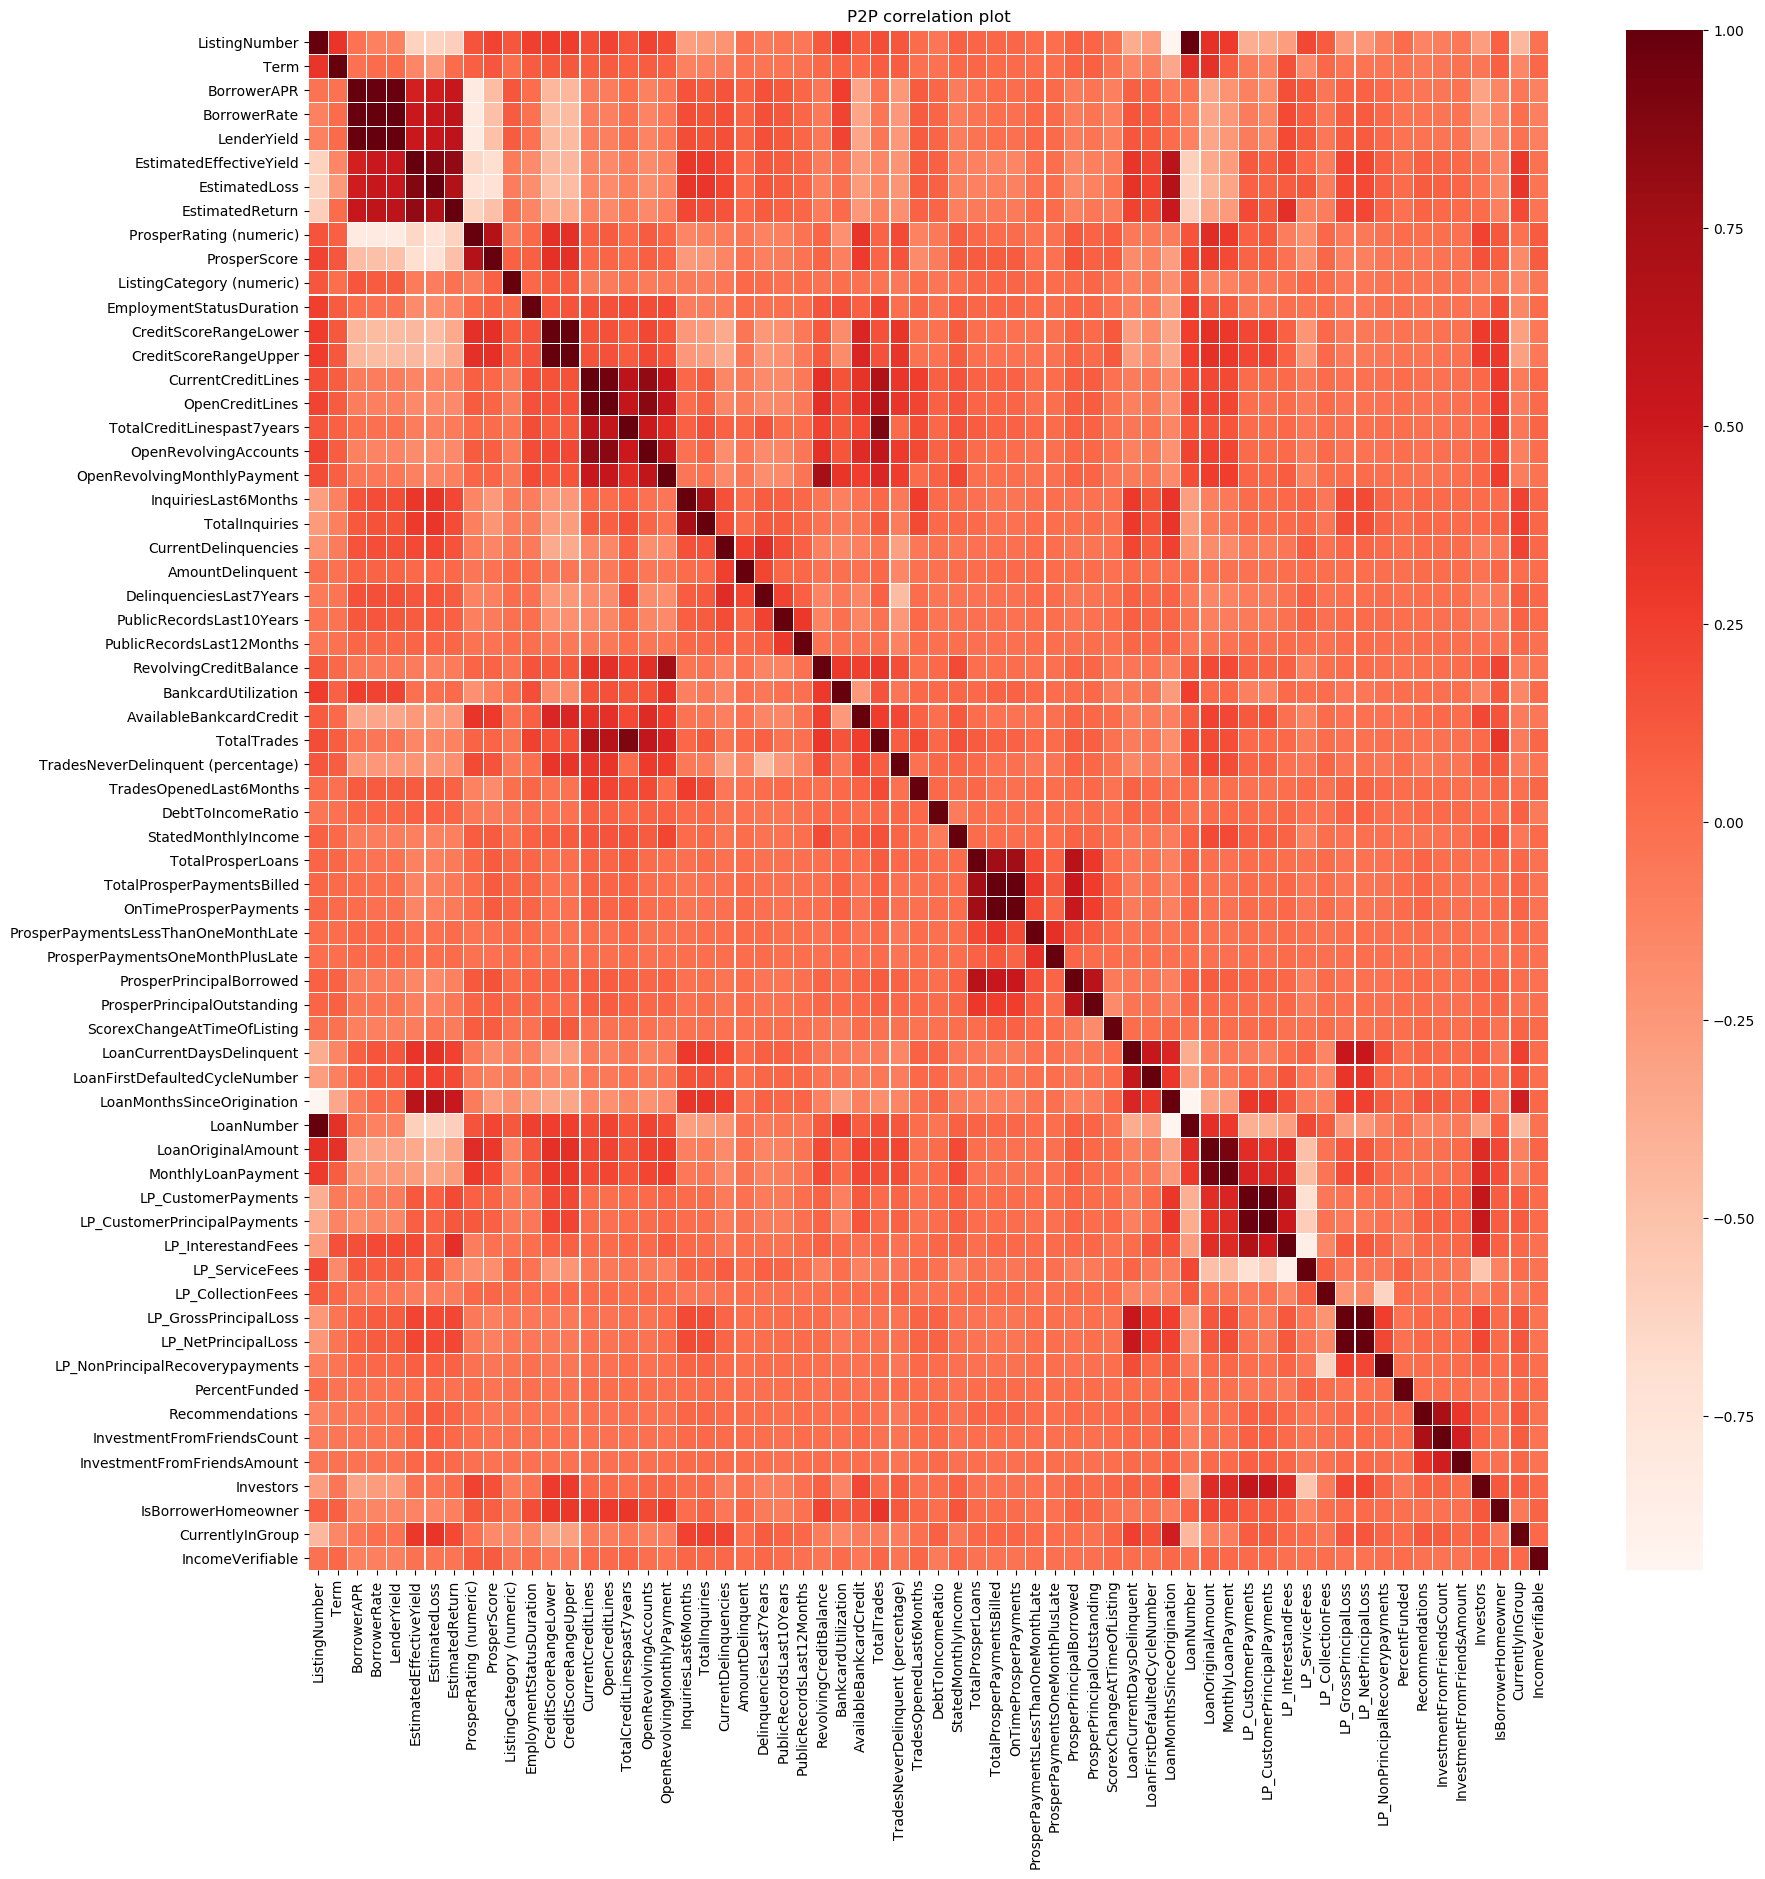

In [33]:
#Heat Map

plt.figure(figsize = (20,20))
plt.title('P2P correlation plot')
corr = new_train.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

I notice a couple of dark squares in the heatmap, which represent the strong correlation and dependancy between those variables and their peers. Such as: 'TotalProsperLoans','OnTimeProsperPayments' & 'TotalProsperPaymentsBilled'

One of the most noticable here is the extremely strong correlation between 'BorrowerAPR' & 'BorrowerRate' which states they are probably dependent variable so we should only use one of them in the model Also there is a weak negative correlation between the 'AvailableBankcardCredit' & The 'BorrowerRate' or APR

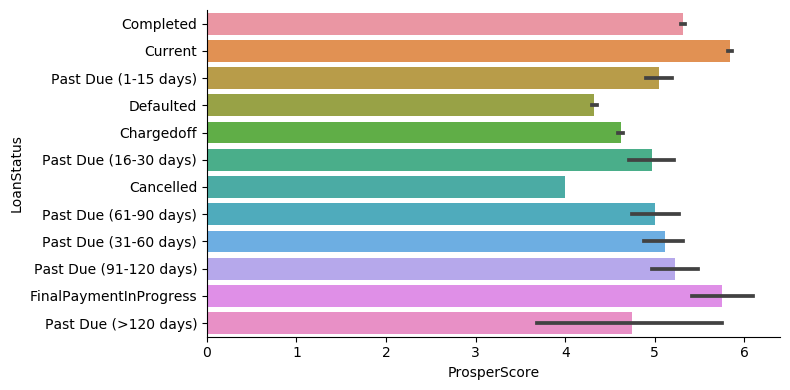

In [34]:
sns.catplot(data = new_train, x = 'ProsperScore', y = 'LoanStatus', kind='bar',height = 4,aspect=2)


*   Current and FinalPaymentInProgress loan status has the highest prosper score
*   Cancelled loan status has the lowest prosper score

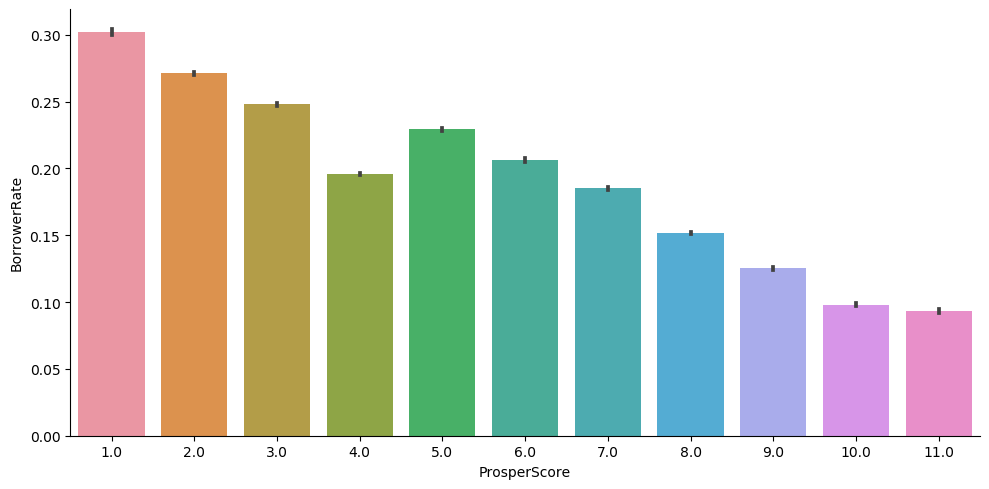

In [35]:
sns.catplot(x='ProsperScore',y='BorrowerRate',data=new_train,kind='bar',height=5, aspect=2);

Borrower rate is positively correlated with Prosper Score.

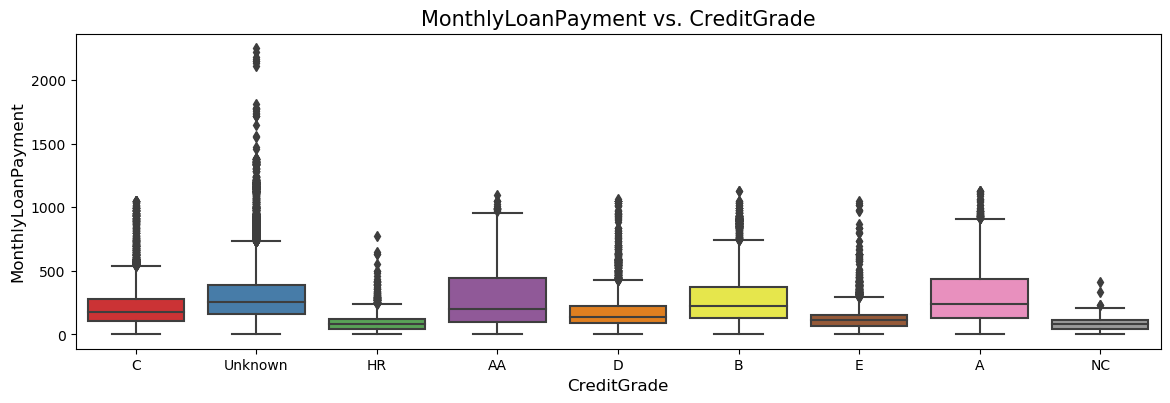

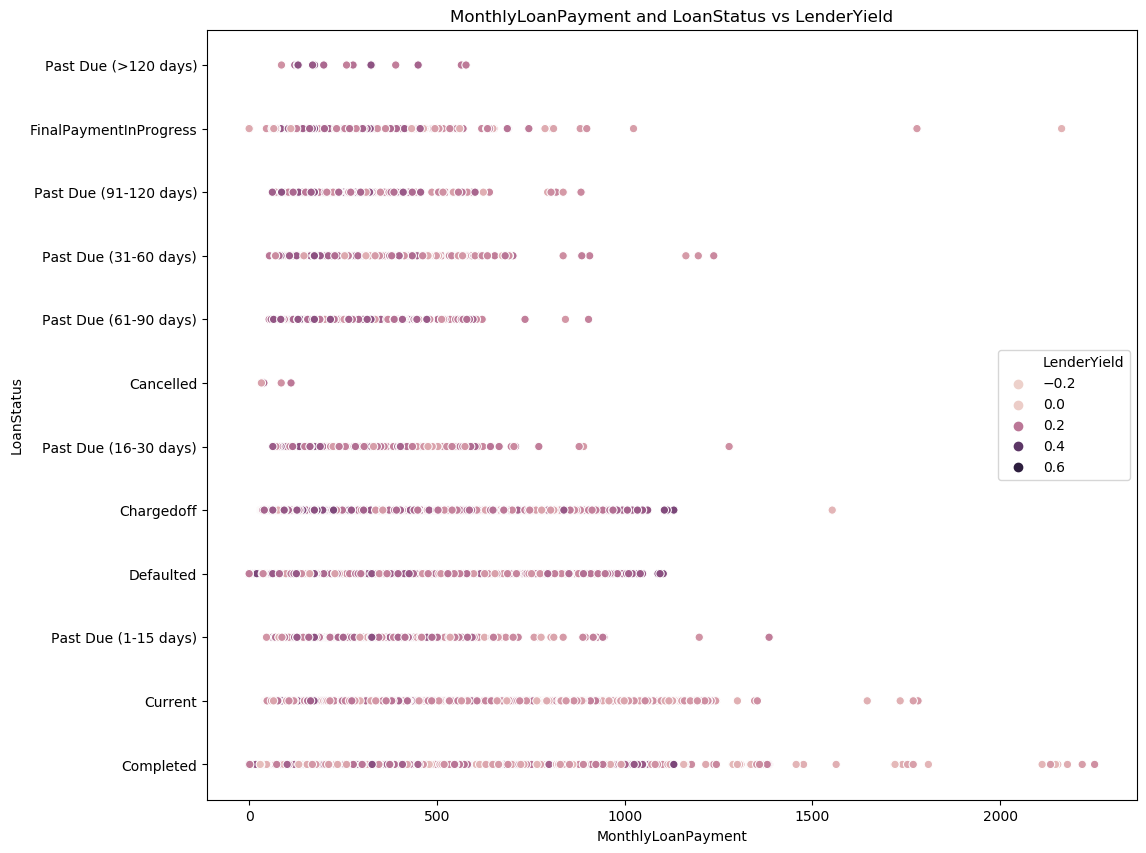

In [36]:
plt.figure(figsize = (14,9))
plt.subplot(211)
ax = sns.boxplot(x='CreditGrade', y='MonthlyLoanPayment', data=new_train, palette="Set1")
ax.set_title("MonthlyLoanPayment vs. CreditGrade", fontsize=15)
ax.set_xlabel("CreditGrade", fontsize=12)
ax.set_ylabel("MonthlyLoanPayment", fontsize=12)


f,ax=plt.subplots(figsize=(12,10))
sns.scatterplot(x='MonthlyLoanPayment',y='LoanStatus',data=new_train,hue='LenderYield')
plt.title('MonthlyLoanPayment and LoanStatus vs LenderYield')

plt.show()

Higher credit grade to the higher monthly loan payment.
The completed and current loan status has the higher monthly loan payment with lower lender yield


Text(0, 0.5, 'DebtToIncomeRatio')

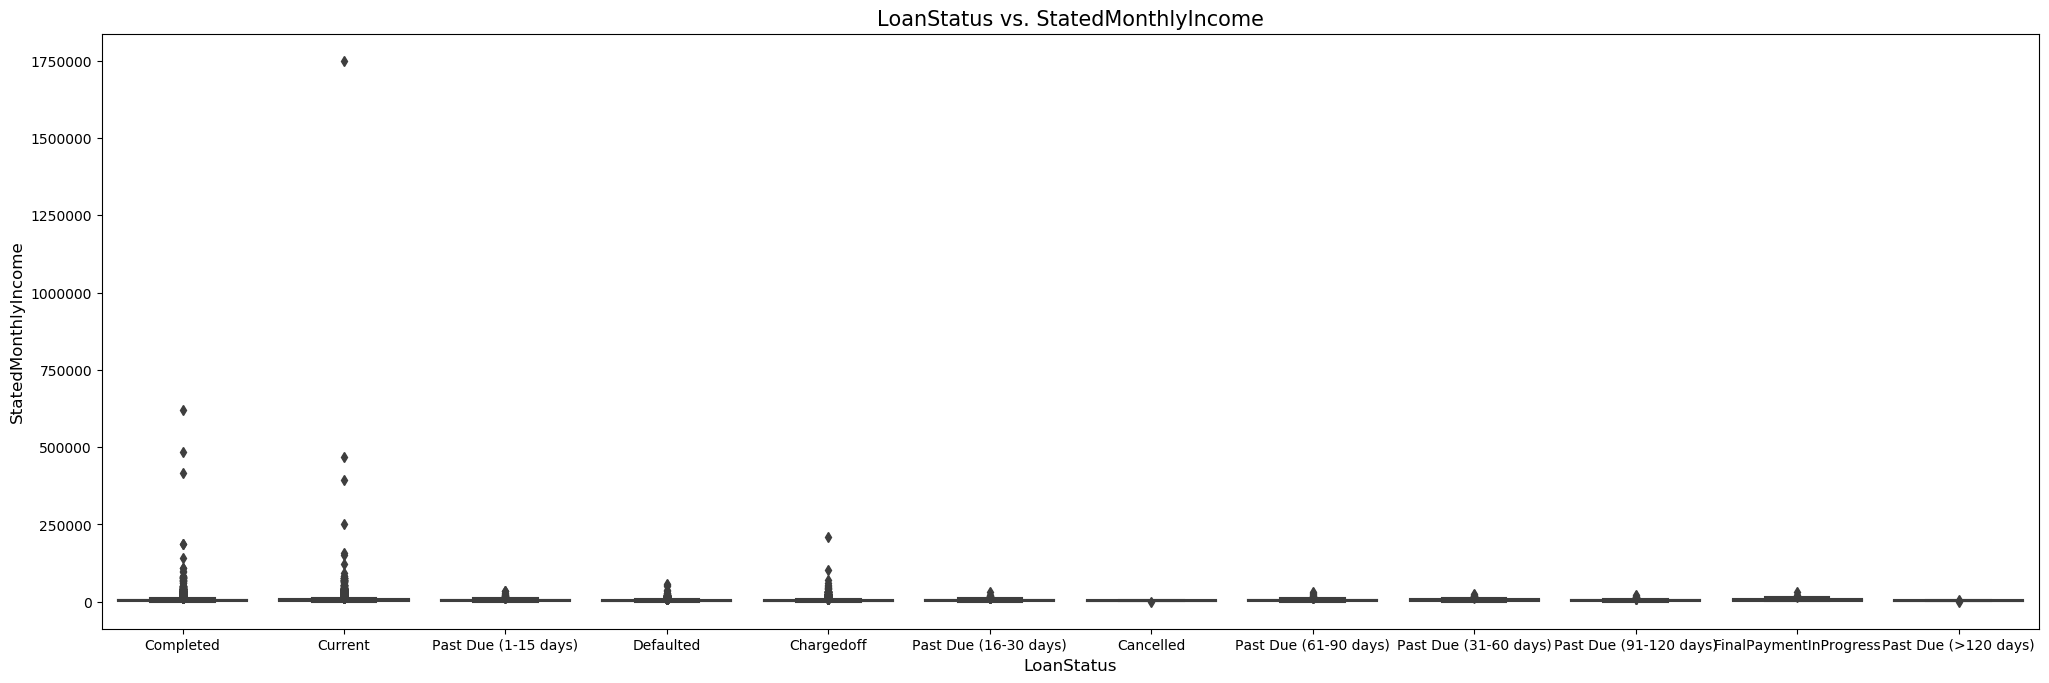

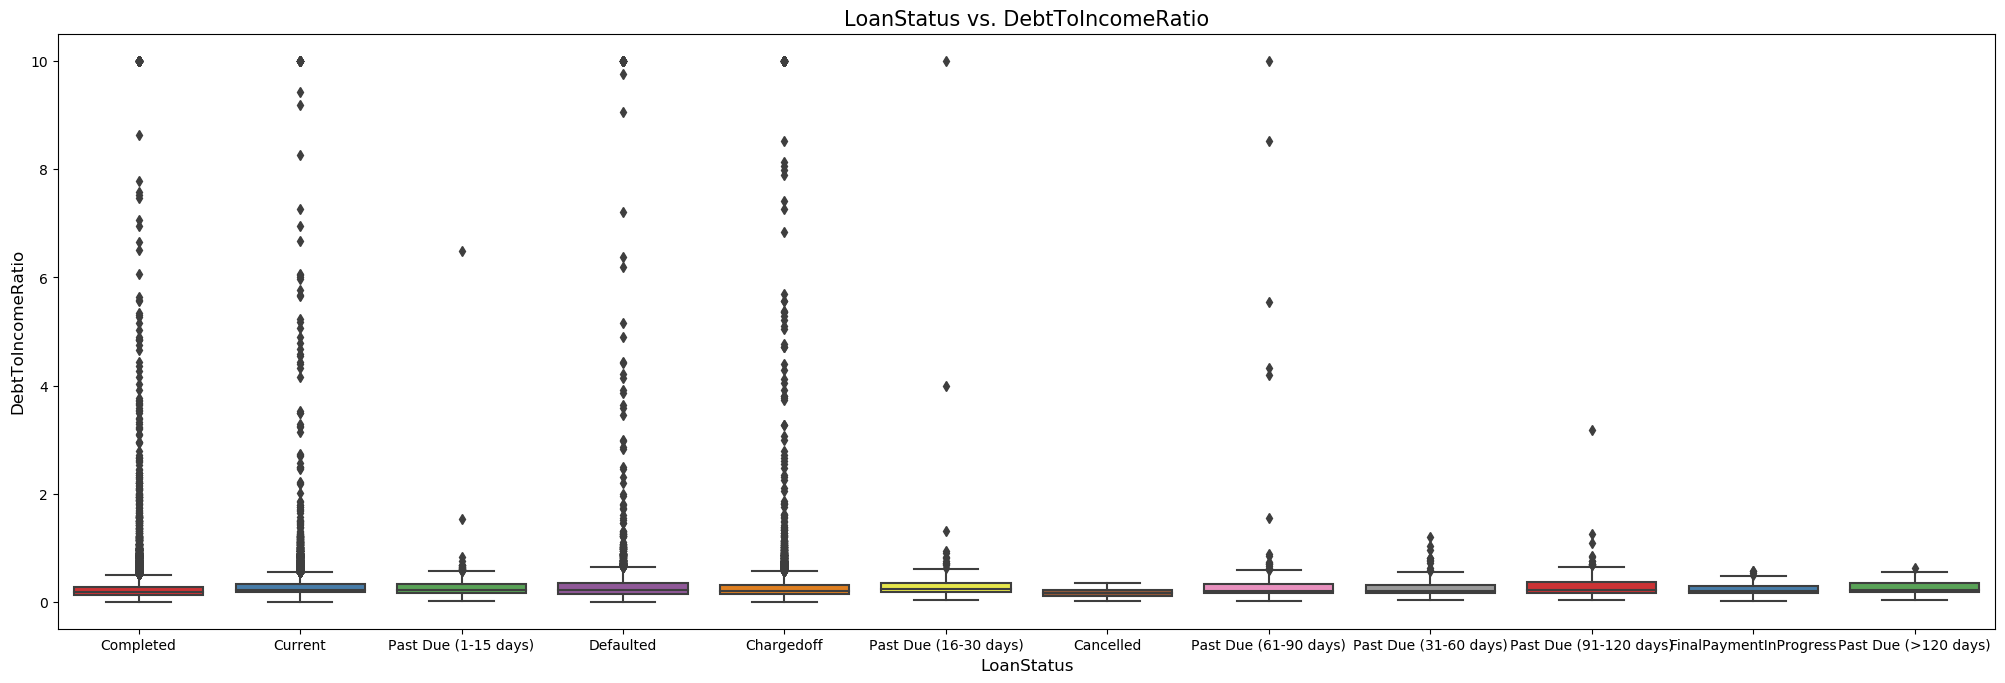

In [37]:
plt.figure(figsize = (25,17))
plt.subplot(211)
ax = sns.boxplot(x="LoanStatus", y="StatedMonthlyIncome", data=new_train, palette="Set1")
ax.set_title("LoanStatus vs. StatedMonthlyIncome", fontsize=15)
ax.set_xlabel("LoanStatus", fontsize=12)
ax.set_ylabel("StatedMonthlyIncome", fontsize=12)

plt.figure(figsize = (25,17))
plt.subplot(211)
ax = sns.boxplot(x="LoanStatus", y="DebtToIncomeRatio", data=new_train, palette="Set1")
ax.set_title("LoanStatus vs. DebtToIncomeRatio", fontsize=15)
ax.set_xlabel("LoanStatus", fontsize=12)
ax.set_ylabel("DebtToIncomeRatio", fontsize=12)

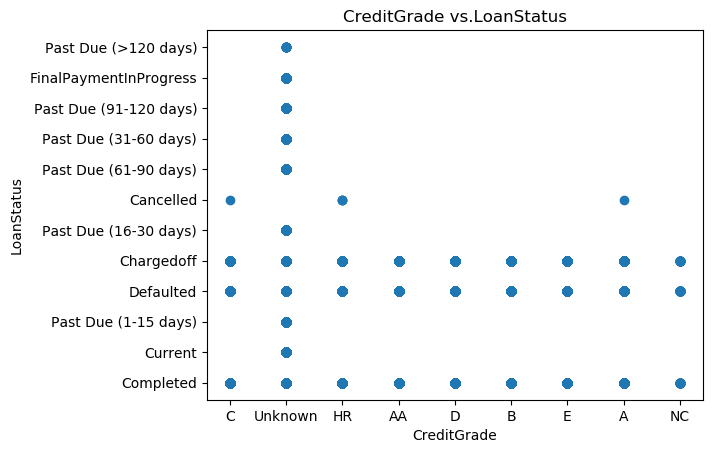

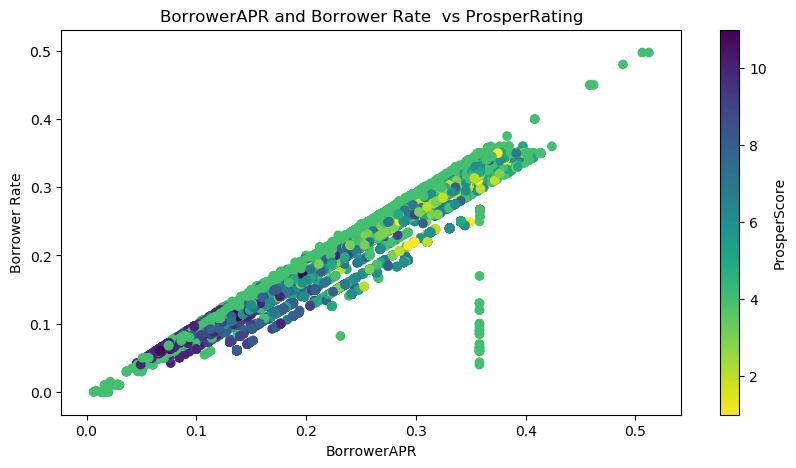

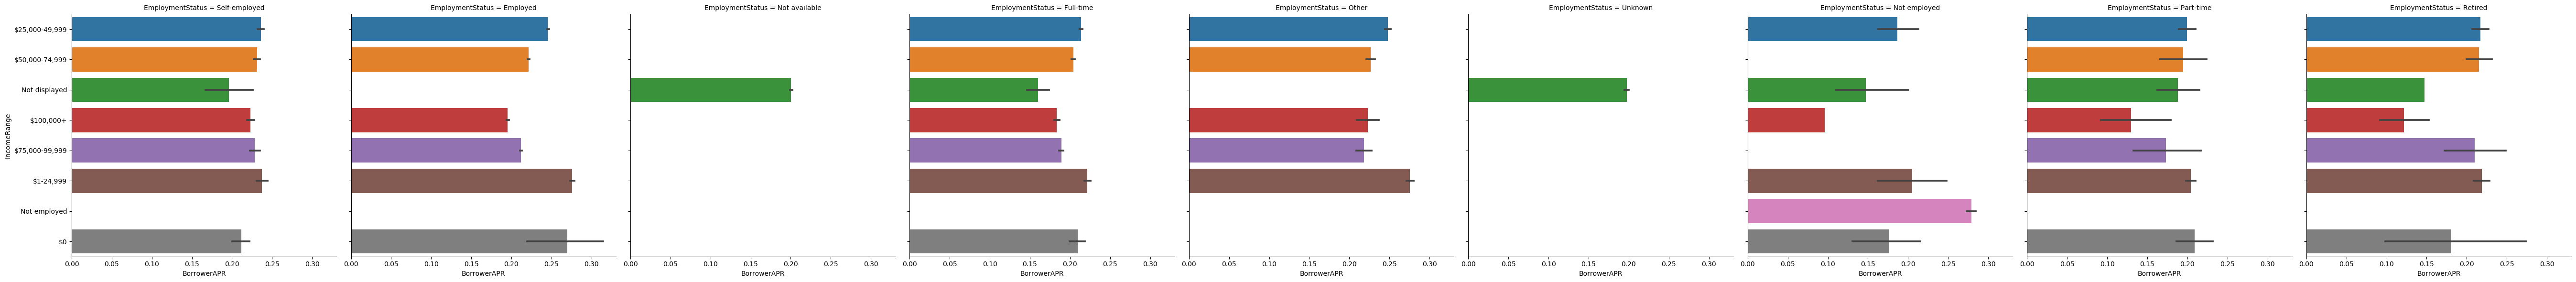

In [38]:
plt.scatter(new_train.CreditGrade,new_train.LoanStatus)
plt.title('CreditGrade vs.LoanStatus')
plt.xlabel('CreditGrade')
plt.ylabel('LoanStatus')

plt.figure(figsize = [10, 5])
plt.scatter(data=new_train,x='BorrowerAPR',y = 'BorrowerRate',c='ProsperScore',cmap = 'viridis_r')
plt.colorbar(label = 'ProsperScore');
plt.xlabel('BorrowerAPR')
plt.ylabel('Borrower Rate')
plt.title('BorrowerAPR and Borrower Rate  vs ProsperRating');


#sns.catplot(data = new_train, x = 'BorrowerAPR', y = 'EmploymentStatus', kind='bar',height = 4)
sns.catplot(data = new_train, x = 'BorrowerAPR', y = 'IncomeRange',\
            col = 'EmploymentStatus', kind='bar', aspect=1,\
           height = 6)

plt.show()

The second chart confirms the relations between BorrowerAPR and BorrowerRate, they have strong positive relationship
In addition, it shows that most of loans with lower BorrowerAPR & BorrowerRate have higher ProsperScore and visa-versa

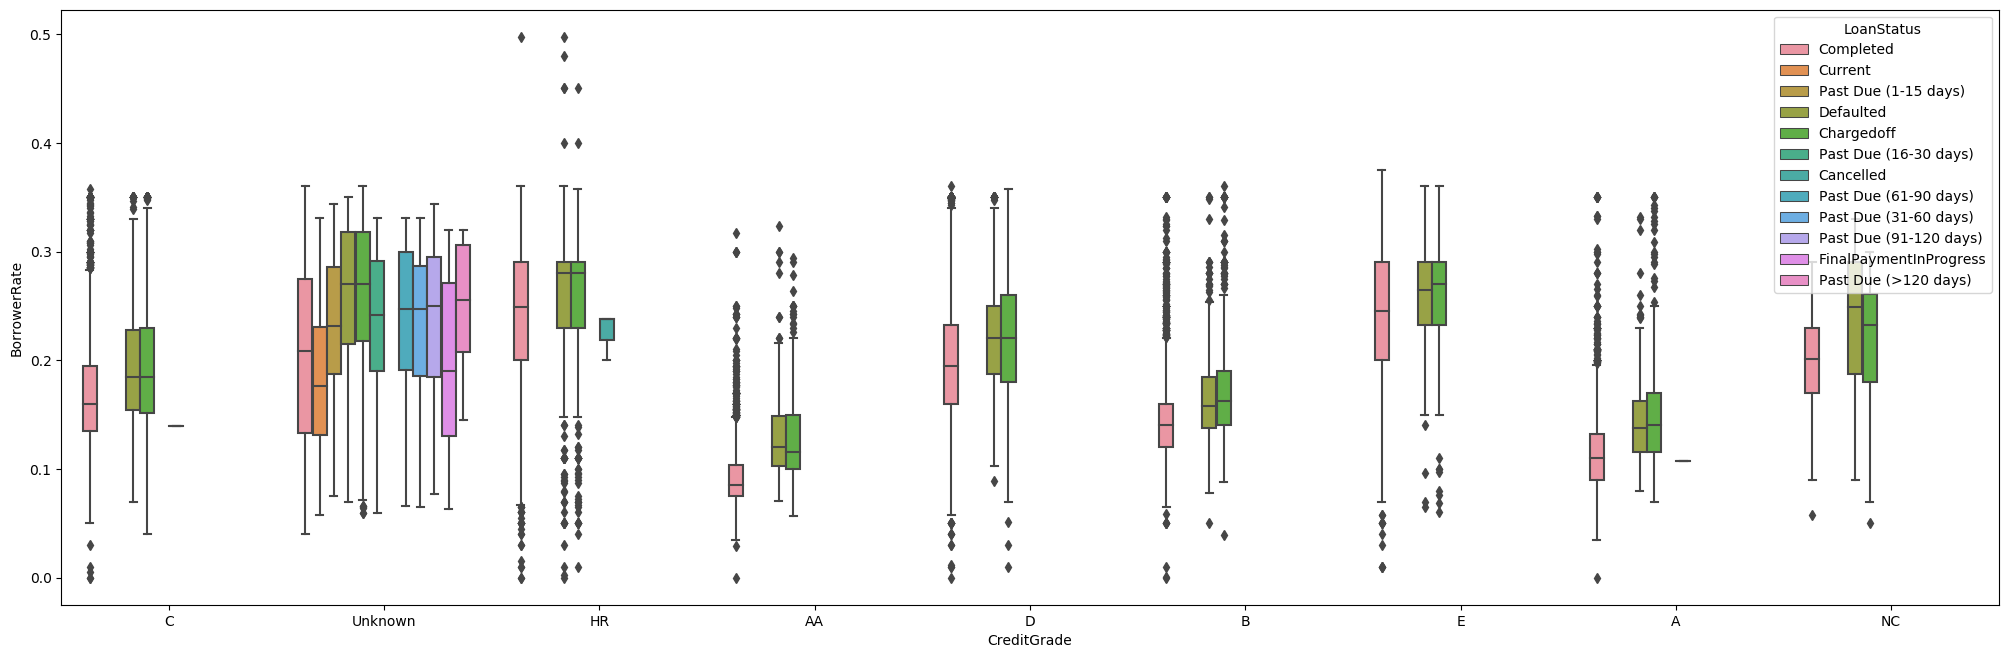

In [39]:
plt.figure(figsize = (25,17))
plt.subplot(211)
sns.boxplot(x="CreditGrade", y='BorrowerRate', hue='LoanStatus', data=new_train)

# Encoding Categorical Variables

In [40]:
new_trains=new_train.drop(['ListingCreationDate','LoanOriginationDate','GroupKey','CreditGrade','ProsperPrincipalBorrowed','ProsperPrincipalOutstanding','EstimatedEffectiveYield','EstimatedLoss','EstimatedReturn','ProsperRating (numeric)','TotalProsperLoans','TotalProsperPaymentsBilled','OnTimeProsperPayments','ProsperPaymentsLessThanOneMonthLate','ProsperPaymentsOneMonthPlusLate','ListingKey'], axis =1)
print(new_trains)

        ListingNumber  Term  BorrowerAPR  BorrowerRate  LenderYield  \
0              193129    36      0.16516        0.1580       0.1380   
1             1209647    36      0.12016        0.0920       0.0820   
2               81716    36      0.28269        0.2750       0.2400   
3              658116    36      0.12528        0.0974       0.0874   
4              909464    36      0.24614        0.2085       0.1985   
...               ...   ...          ...           ...          ...   
113932         753087    36      0.22354        0.1864       0.1764   
113933         537216    36      0.13220        0.1110       0.1010   
113934        1069178    60      0.23984        0.2150       0.2050   
113935         539056    60      0.28408        0.2605       0.2505   
113936        1140093    36      0.13189        0.1039       0.0939   

        ProsperScore  ListingCategory (numeric)  EmploymentStatusDuration  \
0                4.0                          0                       

In [41]:
#Split the data into categorial and numerical
categorial_features = new_trains.select_dtypes(include=[object])
display(categorial_features.head(n=5))
numerical_features = new_trains.select_dtypes(include=[np.number])
display(numerical_features.head(n=5))

LoanStatus           ClosedDate ProsperRating (Alpha) BorrowerState  \
0  Completed  2009-08-14 00:00:00               Unknown            CO   
1    Current              Unknown                     A            CO   
2  Completed  2009-12-17 00:00:00               Unknown            GA   
3    Current              Unknown                     A            GA   
4    Current              Unknown                     D            MN   

      Occupation EmploymentStatus               DateCreditPulled  \
0          Other    Self-employed  2007-08-26 18:41:46.780000000   
1   Professional         Employed            2014-02-27 08:28:14   
2          Other    Not available  2007-01-02 14:09:10.060000000   
3  Skilled Labor         Employed            2012-10-22 11:02:32   
4      Executive         Employed            2013-09-14 18:38:44   

  FirstRecordedCreditLine     IncomeRange                  LoanKey  \
0     2001-10-11 00:00:00  $25,000-49,999  E33A3400205839220442E84   
1     1996-03-18 00:00:00  $50,000-74,999  9E3B37071505919926B1D82   
2     2002-07-27 00:00:00   Not displayed  6954337960046817851BCB2   
3     1983-02-28 00:00:00  $25,000-49,999  A0393664465886295619C51   
4     2004-02-20 00:00:00       $100,000+  A180369302188889200689E   

  LoanOriginationQuarter                MemberKey  
0                Q3 2007  1F3E3376408759268057EDA  
1                Q1 2014  1D13370546739025387B2F4  
2                Q1 2007  5F7033715035555618FA612  
3                Q4 2012  9ADE356069835475068C6D2  
4                Q3 2013  36CE356043264555721F06C

ListingNumber  Term  BorrowerAPR  BorrowerRate  LenderYield  ProsperScore  \
0         193129    36      0.16516        0.1580       0.1380           4.0   
1        1209647    36      0.12016        0.0920       0.0820           7.0   
2          81716    36      0.28269        0.2750       0.2400           4.0   
3         658116    36      0.12528        0.0974       0.0874           9.0   
4         909464    36      0.24614        0.2085       0.1985           4.0   

   ListingCategory (numeric)  EmploymentStatusDuration  CreditScoreRangeLower  \
0                          0                       2.0                  640.0   
1                          2                      44.0                  680.0   
2                          0                       0.0                  480.0   
3                         16                     113.0                  800.0   
4                          2                      44.0                  680.0   

   CreditScoreRangeUpper  CurrentCreditLines  OpenCreditLines  \
0                  659.0                 5.0              4.0   
1                  699.0                14.0             14.0   
2                  499.0                 8.0              7.0   
3                  819.0                 5.0              5.0   
4                  699.0                19.0             19.0   

   TotalCreditLinespast7years  OpenRevolvingAccounts  \
0                        12.0                      1   
1                        29.0                     13   
2                         3.0                      0   
3                        29.0                      7   
4                        49.0                      6   

   OpenRevolvingMonthlyPayment  InquiriesLast6Months  TotalInquiries  \
0                         24.0                   3.0             3.0   
1                        389.0                   3.0             5.0   
2                          0.0                   0.0             1.0   
3                        115.0                   0.0             1.0   
4                        220.0                   1.0             9.0   

   CurrentDelinquencies  AmountDelinquent  DelinquenciesLast7Years  \
0                   2.0             472.0                      4.0   
1                   0.0               0.0                      0.0   
2                   1.0               0.0                      0.0   
3                   4.0           10056.0                     14.0   
4                   0.0               0.0                      0.0   

   PublicRecordsLast10Years  PublicRecordsLast12Months  \
0                       0.0                        0.0   
1                       1.0                        0.0   
2                       0.0                        0.0   
3                       0.0                        0.0   
4                       0.0                        0.0   

   RevolvingCreditBalance  BankcardUtilization  AvailableBankcardCredit  \
0                     0.0                 0.00                   1500.0   
1                  3989.0                 0.21                  10266.0   
2                     0.0                 0.00                      0.0   
3                  1444.0                 0.04                  30754.0   
4                  6193.0                 0.81                    695.0   

   TotalTrades  TradesNeverDelinquent (percentage)  TradesOpenedLast6Months  \
0         11.0                                0.81                      0.0   
1         29.0                                1.00                      2.0   
2         17.0                                1.00                      0.0   
3         26.0                                0.76                      0.0   
4         39.0                                0.95                      2.0   

   DebtToIncomeRatio  StatedMonthlyIncome  ScorexChangeAtTimeOfListing  \
0               0.17          3083.333333                          0.0   
1               0.18          

In [42]:
# Apply scaler to the features
scaler = MinMaxScaler()
numerical=["ListingNumber","Term","BorrowerAPR","BorrowerRate","LenderYield","ListingCategory (numeric)","EmploymentStatusDuration","CreditScoreRangeLower","CreditScoreRangeUpper","CurrentCreditLines","OpenCreditLines","TotalCreditLinespast7years","OpenRevolvingAccounts","OpenRevolvingMonthlyPayment","InquiriesLast6Months","TotalInquiries","CurrentDelinquencies","AmountDelinquent","DelinquenciesLast7Years","PublicRecordsLast10Years","PublicRecordsLast12Months","RevolvingCreditBalance","BankcardUtilization","AvailableBankcardCredit","TotalTrades","TradesNeverDelinquent (percentage)","TradesOpenedLast6Months","DebtToIncomeRatio","StatedMonthlyIncome","ScorexChangeAtTimeOfListing","LoanCurrentDaysDelinquent","LoanFirstDefaultedCycleNumber","LoanMonthsSinceOrigination","LoanNumber","LoanOriginalAmount","MonthlyLoanPayment","LP_CustomerPayments","LP_CustomerPrincipalPayments","LP_InterestandFees","LP_ServiceFees","LP_CollectionFees","LP_GrossPrincipalLoss","LP_NetPrincipalLoss","LP_NonPrincipalRecoverypayments","PercentFunded","Recommendations","InvestmentFromFriendsCount","InvestmentFromFriendsAmount","Investors","ProsperScore"]
features_final=new_trains.drop('LoanStatus', axis = 1)
feature_total=pd.DataFrame(features_final)
feature_total[numerical]=scaler.fit_transform(features_final[numerical])
display(feature_total.head(n=5))

ListingNumber  Term  BorrowerAPR  BorrowerRate  LenderYield  ProsperScore  \
0       0.153796   0.5     0.313647      0.317588     0.294527           0.3   
1       0.963306   0.5     0.224672      0.184925     0.183085           0.6   
2       0.065072   0.5     0.546030      0.552764     0.497512           0.3   
3       0.524091   0.5     0.234795      0.195779     0.193831           0.8   
4       0.724253   0.5     0.473762      0.419095     0.414925           0.3   

   ListingCategory (numeric)  EmploymentStatusDuration  CreditScoreRangeLower  \
0                        0.0                  0.002649               0.727273   
1                        0.1                  0.058278               0.772727   
2                        0.0                  0.000000               0.545455   
3                        0.8                  0.149669               0.909091   
4                        0.1                  0.058278               0.772727   

   CreditScoreRangeUpper  CurrentCreditLines  OpenCreditLines  \
0               0.727273            0.084746         0.074074   
1               0.772727            0.237288         0.259259   
2               0.545455            0.135593         0.129630   
3               0.909091            0.084746         0.092593   
4               0.772727            0.322034         0.351852   

   TotalCreditLinespast7years  OpenRevolvingAccounts  \
0                    0.074627               0.019608   
1                    0.201493               0.254902   
2                    0.007463               0.000000   
3                    0.201493               0.137255   
4                    0.350746               0.117647   

   OpenRevolvingMonthlyPayment  InquiriesLast6Months  TotalInquiries  \
0                     0.001602              0.028571        0.007916   
1                     0.025959              0.028571        0.013193   
2                     0.000000              0.000000        0.002639   
3                     0.007674              0.000000        0.002639   
4                     0.014681              0.009524        0.023747   

   CurrentDelinquencies  AmountDelinquent  DelinquenciesLast7Years  \
0              0.024096          0.001018                 0.040404   
1              0.000000          0.000000                 0.000000   
2              0.012048          0.000000                 0.000000   
3              0.048193          0.021678                 0.141414   
4              0.000000          0.000000                 0.000000   

   PublicRecordsLast10Years  PublicRecordsLast12Months  \
0                  0.000000                        0.0   
1                  0.026316                        0.0   
2                  0.000000                        0.0   
3                  0.000000                        0.0   
4                  0.000000                        0.0   

   RevolvingCreditBalance  BankcardUtilization  AvailableBankcardCredit  \
0                0.000000             0.000000                 0.002321   
1                0.002778             0.035294                 0.015885   
2                0.000000             0.000000                 0.000000   
3                0.001006             0.006723                 0.047586   
4                0.004314             0.136134                 0.001075   

   TotalTrades  TradesNeverDelinquent (percentage)  TradesOpenedLast6Months  \
0     0.087302                                0.81                      0.0   
1     0.230159                                1.00                      0.1   
2     0.134921                                1.00                      0.0   
3     0.206349                                0.76                      0.0   
4     0.309524                                0.95                      0.1   

   DebtToIncomeRatio  StatedMonthlyIncome  ScorexChangeAtTimeOfListing  \
0           0.016983             0.001762                     0.422222   
1           0.017982          

In [43]:
# One Hot Encoding
loan = pd.get_dummies(new_trains["LoanStatus"])
display(loan.head())

Cancelled  Chargedoff  Completed  Current  Defaulted  \
0          0           0          1        0          0   
1          0           0          0        1          0   
2          0           0          1        0          0   
3          0           0          0        1          0   
4          0           0          0        1          0   

   FinalPaymentInProgress  Past Due (1-15 days)  Past Due (16-30 days)  \
0                       0                     0                      0   
1                       0                     0                      0   
2                       0                     0                      0   
3                       0                     0                      0   
4                       0                     0                      0   

   Past Due (31-60 days)  Past Due (61-90 days)  Past Due (91-120 days)  \
0                      0                      0                       0   
1                      0                      0                       0   
2                      0                      0                       0   
3                      0                      0                       0   
4                      0                      0                       0   

   Past Due (>120 days)  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0

In [44]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
cols = ['ClosedDate','ProsperRating (Alpha)','BorrowerState','Occupation','EmploymentStatus','FirstRecordedCreditLine','DateCreditPulled','IncomeRange','LoanKey','LoanOriginationQuarter',
       'MemberKey']
# Encode labels of multiple columns at once

feature_total[cols] = feature_total[cols].apply(LabelEncoder().fit_transform)

# Print head

feature_total.head()

ListingNumber  Term  BorrowerAPR  BorrowerRate  LenderYield  ProsperScore  \
0       0.153796   0.5     0.313647      0.317588     0.294527           0.3   
1       0.963306   0.5     0.224672      0.184925     0.183085           0.6   
2       0.065072   0.5     0.546030      0.552764     0.497512           0.3   
3       0.524091   0.5     0.234795      0.195779     0.193831           0.8   
4       0.724253   0.5     0.473762      0.419095     0.414925           0.3   

   ListingCategory (numeric)  EmploymentStatusDuration  CreditScoreRangeLower  \
0                        0.0                  0.002649               0.727273   
1                        0.1                  0.058278               0.772727   
2                        0.0                  0.000000               0.545455   
3                        0.8                  0.149669               0.909091   
4                        0.1                  0.058278               0.772727   

   CreditScoreRangeUpper  CurrentCreditLines  OpenCreditLines  \
0               0.727273            0.084746         0.074074   
1               0.772727            0.237288         0.259259   
2               0.545455            0.135593         0.129630   
3               0.909091            0.084746         0.092593   
4               0.772727            0.322034         0.351852   

   TotalCreditLinespast7years  OpenRevolvingAccounts  \
0                    0.074627               0.019608   
1                    0.201493               0.254902   
2                    0.007463               0.000000   
3                    0.201493               0.137255   
4                    0.350746               0.117647   

   OpenRevolvingMonthlyPayment  InquiriesLast6Months  TotalInquiries  \
0                     0.001602              0.028571        0.007916   
1                     0.025959              0.028571        0.013193   
2                     0.000000              0.000000        0.002639   
3                     0.007674              0.000000        0.002639   
4                     0.014681              0.009524        0.023747   

   CurrentDelinquencies  AmountDelinquent  DelinquenciesLast7Years  \
0              0.024096          0.001018                 0.040404   
1              0.000000          0.000000                 0.000000   
2              0.012048          0.000000                 0.000000   
3              0.048193          0.021678                 0.141414   
4              0.000000          0.000000                 0.000000   

   PublicRecordsLast10Years  PublicRecordsLast12Months  \
0                  0.000000                        0.0   
1                  0.026316                        0.0   
2                  0.000000                        0.0   
3                  0.000000                        0.0   
4                  0.000000                        0.0   

   RevolvingCreditBalance  BankcardUtilization  AvailableBankcardCredit  \
0                0.000000             0.000000                 0.002321   
1                0.002778             0.035294                 0.015885   
2                0.000000             0.000000                 0.000000   
3                0.001006             0.006723                 0.047586   
4                0.004314             0.136134                 0.001075   

   TotalTrades  TradesNeverDelinquent (percentage)  TradesOpenedLast6Months  \
0     0.087302                                0.81                      0.0   
1     0.230159                                1.00                      0.1   
2     0.134921                                1.00                      0.0   
3     0.206349                                0.76                      0.0   
4     0.309524                                0.95                      0.1   

   DebtToIncomeRatio  StatedMonthlyIncome  ScorexChangeAtTimeOfListing  \
0           0.016983             0.001762                     0.422222   
1           0.017982          

# Checking on Data before training

In [45]:
loans= loan.drop(["Cancelled","Chargedoff","Current","Defaulted","FinalPaymentInProgress","Past Due (1-15 days)","Past Due (16-30 days)","Past Due (31-60 days)","Past Due (61-90 days)","Past Due (91-120 days)","Past Due (91-120 days)","Past Due (>120 days)"],axis=1)
print(loans)

        Completed
0               1
1               0
2               1
3               0
4               0
...           ...
113932          0
113933          0
113934          0
113935          1
113936          0

[113937 rows x 1 columns]


In [46]:
display(feature_total.head())

ListingNumber  Term  BorrowerAPR  BorrowerRate  LenderYield  ProsperScore  \
0       0.153796   0.5     0.313647      0.317588     0.294527           0.3   
1       0.963306   0.5     0.224672      0.184925     0.183085           0.6   
2       0.065072   0.5     0.546030      0.552764     0.497512           0.3   
3       0.524091   0.5     0.234795      0.195779     0.193831           0.8   
4       0.724253   0.5     0.473762      0.419095     0.414925           0.3   

   ListingCategory (numeric)  EmploymentStatusDuration  CreditScoreRangeLower  \
0                        0.0                  0.002649               0.727273   
1                        0.1                  0.058278               0.772727   
2                        0.0                  0.000000               0.545455   
3                        0.8                  0.149669               0.909091   
4                        0.1                  0.058278               0.772727   

   CreditScoreRangeUpper  CurrentCreditLines  OpenCreditLines  \
0               0.727273            0.084746         0.074074   
1               0.772727            0.237288         0.259259   
2               0.545455            0.135593         0.129630   
3               0.909091            0.084746         0.092593   
4               0.772727            0.322034         0.351852   

   TotalCreditLinespast7years  OpenRevolvingAccounts  \
0                    0.074627               0.019608   
1                    0.201493               0.254902   
2                    0.007463               0.000000   
3                    0.201493               0.137255   
4                    0.350746               0.117647   

   OpenRevolvingMonthlyPayment  InquiriesLast6Months  TotalInquiries  \
0                     0.001602              0.028571        0.007916   
1                     0.025959              0.028571        0.013193   
2                     0.000000              0.000000        0.002639   
3                     0.007674              0.000000        0.002639   
4                     0.014681              0.009524        0.023747   

   CurrentDelinquencies  AmountDelinquent  DelinquenciesLast7Years  \
0              0.024096          0.001018                 0.040404   
1              0.000000          0.000000                 0.000000   
2              0.012048          0.000000                 0.000000   
3              0.048193          0.021678                 0.141414   
4              0.000000          0.000000                 0.000000   

   PublicRecordsLast10Years  PublicRecordsLast12Months  \
0                  0.000000                        0.0   
1                  0.026316                        0.0   
2                  0.000000                        0.0   
3                  0.000000                        0.0   
4                  0.000000                        0.0   

   RevolvingCreditBalance  BankcardUtilization  AvailableBankcardCredit  \
0                0.000000             0.000000                 0.002321   
1                0.002778             0.035294                 0.015885   
2                0.000000             0.000000                 0.000000   
3                0.001006             0.006723                 0.047586   
4                0.004314             0.136134                 0.001075   

   TotalTrades  TradesNeverDelinquent (percentage)  TradesOpenedLast6Months  \
0     0.087302                                0.81                      0.0   
1     0.230159                                1.00                      0.1   
2     0.134921                                1.00                      0.0   
3     0.206349                                0.76                      0.0   
4     0.309524                                0.95                      0.1   

   DebtToIncomeRatio  StatedMonthlyIncome  ScorexChangeAtTimeOfListing  \
0           0.016983             0.001762                     0.422222   
1           0.017982          

# Training Model

In [47]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'sales' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feature_total, 
                                                    loans, 
                                                    test_size = 0.2, 
                                                    random_state = 50)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 91149 samples.
Testing set has 22788 samples.


In [48]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# training the model
log=model.fit(X_train, y_train)
test_pred=log.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = model.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 75.37%


In [49]:
# Import LinearRegression algorithm
from sklearn.linear_model import LinearRegression
# Import mean squared error
from sklearn.metrics import mean_squared_error
# Initiate the model
from time import time
start = time()
# Fit the model to our dataset
model = LinearRegression()
reg=model.fit(X_train, y_train)
test_pred=reg.predict(X_test)
test_mse = mean_squared_error(y_test, test_pred)
accuracy=model.score(X_test, y_test)
end = time()
duration=end-start
# Show the results
print(f"The duration of training is: {duration}")
print(f"R_squared for the validation data is:{accuracy}")
print(f"The mean squared error for the testing model is:{test_mse} ")

The duration of training is: 1.1533620357513428
R_squared for the validation data is:0.7396107677163728
The mean squared error for the testing model is:0.05796296535835933 


In [50]:
# Import Lasso Regression algorithm
from sklearn.linear_model import Lasso
# Initiate the model
start = time()
las_model = Lasso(alpha = 1, max_iter=2000, random_state=10)
# Fit the model to our dataset
las_model.fit(X_train, y_train)
test_preds = las_model.predict(X_test)
test_mse_las = mean_squared_error(y_test, test_preds)
accuracy=las_model.score(X_test, y_test)
end = time()
duration=end-start
# Show the results
print(f"The duration of training is: {duration}")
print(f"R_squared for the validation data is:{accuracy}")
print(f"The mean squared error for the testing model is:{test_mse_las} ")

The duration of training is: 1.5133812427520752
R_squared for the validation data is:0.2937742835488527
The mean squared error for the testing model is:0.15720671849153978 


In [51]:
# Import Ridge Regression algorithm
from sklearn.linear_model import Ridge
# Initiate the model
start = time()
ridg_model = Ridge(alpha=1.0)
# Fit the model to our dataset
ridg_model.fit(X_train, y_train)
test_preds = ridg_model.predict(X_test)
test_mse_ridg = mean_squared_error(y_test, test_preds)
accuracy=ridg_model.score(X_test, y_test)
end = time()
duration=end-start
# Show the results
print(f"The duration of training is: {duration}")
print(f"R_squared for the validation data is:{accuracy}")
print(f"The mean squared error for the testing model is:{test_mse_ridg} ")

The duration of training is: 1.0694911479949951
R_squared for the validation data is:0.7396993659291836
The mean squared error for the testing model is:0.05794324328654042 


**Summary:**
Accuracy of MSE:56.5 %,

Accuracy of Lasso Regression: 0 %,

Accuracy of Ridge Regression: 56.3 %.

so we choose Linear Regression with accuracy about 56.5 %

In [52]:
# Import  Random Forest Regressor algorithm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
# Initiate the model
start = time()
ran_model = RandomForestRegressor(n_estimators = 50)
# Fit the model to our dataset
ran_model.fit(X_train, y_train)
test_predsr = ran_model.predict(X_test)
accuracy=r2_score(y_test, test_predsr)
test_mse_ran = mean_squared_error(y_test, test_predsr)
end = time()
duration=end-start
# Show the results
print(f"The duration of training is: {duration}")
print(f"R_squared for the validation data is:{accuracy}")
print(f"The mean squared error for the model is:{test_mse_ran} ")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


The duration of training is: 16.678889751434326
R_squared for the validation data is:0.9998060180534059
The mean squared error for the model is:4.3180621379673515e-05 


In [53]:
# Import XGBRegressor algorithm
from xgboost import XGBRegressor
# Import mean squared error
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import KFold, cross_val_score
# Initiate the model
start = time()
xgb_model = XGBRegressor(random_state = 10)
# Fit the model to our dataset
xgb_model.fit(X_train, y_train)
k_fold = KFold(n_splits=20, shuffle=True)
kf_cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=k_fold)
test_predsx = xgb_model.predict(X_test)
test_mse_xgb = mean_squared_error(y_test, test_predsx)
accuracy=r2_score(y_test, test_predsx)
end = time()
duration=end-start
# Show the results
print(f"The duration of training is: {duration}")
print(f"R_squared for the validation data is:{accuracy}")
print(f"The mean squared error for the model is:{test_mse_xgb} ")
print(f"K-fold CV average score: {kf_cv_scores.mean()}")

The duration of training is: 250.15615105628967
R_squared for the validation data is:0.999803072504479
The mean squared error for the model is:4.383630584925413e-05 
K-fold CV average score: 0.9999501744631892


**Summary:**
Accuracy of Linear Regression:56.5 %,

Accuracy of XGB Regressor: 99.3 %,

Accuracy of Random Forest Regressor: 99.1 %.

we will chose XGB Regressor for training with accuracy about 99.3 %

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
# Initialize the classifier
reg = XGBRegressor(random_state = 10)

# Create the parameters list you wish to tune, using a dictionary if needed.
parameters = {'n_estimators': [5, 10, 15],
              'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 1, 2, 3]}

# Make an r2_score scoring object using make_scorer()
scorer = make_scorer(r2_score)

# Performing grid search on the regressor using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(reg, parameters, scoring = scorer)

# Fitting the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)
predictions = grid_obj.predict(X_test)
MSEbe=mean_squared_error(y_test, predictions)
accuracybe=r2_score(y_test, predictions)
# Get the estimator
best_reg = grid_fit.best_estimator_

# Making predictions using the unoptimized and optimized model
predictions = (reg.fit(X_train, y_train)).predict(X_test)
best_predictions = best_reg.predict(X_test)
accuracyaf=r2_score(y_test, best_predictions)
MSEaf=mean_squared_error(y_test, best_predictions)


In [55]:
# Report the before-and-afterscores
print("Unoptimized model\n------")
print("R squared score on testing data: {:.4f}".format(accuracybe))
print("Mean Squared Error on testing data: {:.4f}".format(MSEbe))
print("\nOptimized Model\n------")
print("Final R squared score on the testing data: {:.4f}".format(accuracyaf))
print("Final F-Mean Squared Error on the testing data: {:.4f}".format(MSEaf))

Unoptimized model
------
R squared score on testing data: 0.9998
Mean Squared Error on testing data: 0.0000

Optimized Model
------
Final R squared score on the testing data: 0.9998
Final F-Mean Squared Error on the testing data: 0.0000


So there isn't any changes between the unoptimized model and the unoptimized model  so we choose either for the next step

In [56]:
train_data = new_trains.iloc[:-500].sample(len(new_trains)-500)
test_data = new_trains.iloc[-500:]
display(train_data.head())

ListingNumber  Term  BorrowerAPR  BorrowerRate  LenderYield  \
5476          732498    60      0.20081        0.1769       0.1669   
45315        1040404    60      0.15425        0.1314       0.1214   
60663         511447    36      0.30532        0.2699       0.2599   
53614         475204    36      0.39275        0.3300       0.3200   
68881         550191    60      0.20358        0.1845       0.1745   

       ProsperScore  ListingCategory (numeric)  EmploymentStatusDuration  \
5476            4.0                          1                      89.0   
45315           7.0                          1                      94.0   
60663           5.0                          1                     170.0   
53614           3.0                          2                     194.0   
68881           8.0                          7                       6.0   

       CreditScoreRangeLower  CreditScoreRangeUpper  CurrentCreditLines  \
5476                   740.0                  759.0                11.0   
45315                  760.0                  779.0                18.0   
60663                  720.0                  739.0                 9.0   
53614                  640.0                  659.0                 6.0   
68881                  720.0                  739.0                 8.0   

       OpenCreditLines  TotalCreditLinespast7years  OpenRevolvingAccounts  \
5476               9.0                        63.0                      6   
45315             17.0                        36.0                     16   
60663              9.0                        36.0                      5   
53614              4.0                        25.0                      0   
68881              7.0                        17.0                      8   

       OpenRevolvingMonthlyPayment  InquiriesLast6Months  TotalInquiries  \
5476                         343.0                   0.0             7.0   
45315                        763.0                   1.0             2.0   
60663                        417.0                   0.0             1.0   
53614                          0.0                   5.0            11.0   
68881                        328.0                   0.0             0.0   

       CurrentDelinquencies  AmountDelinquent  DelinquenciesLast7Years  \
5476                    0.0               0.0                      0.0   
45315                   0.0               0.0                      0.0   
60663                   0.0               0.0                      0.0   
53614                   0.0               0.0                     17.0   
68881                   0.0               0.0                      0.0   

       PublicRecordsLast10Years  PublicRecordsLast12Months  \
5476                        0.0                        0.0   
45315                       0.0                        0.0   
60663                       0.0                        0.0   
53614                       0.0                        0.0   
68881                       0.0                        0.0   

       RevolvingCreditBalance  BankcardUtilization  AvailableBankcardCredit  \
5476                  15420.0                 0.98                    164.0   
45315                110198.0                 0.68                  49501.0   
60663                 27454.0                 0.98                    456.0   
53614                     0.0                 0.00                      0.0   
68881                  8491.0                 0.49                   8609.0   

       TotalTrades  TradesNeverDelinquent (percentage)  \
5476          42.0                                1.00   
45315         35.0                                1.00   
60663         34.0                                0.94   
53614         24.0                                0.70   
68881         14.0                                0.93   

       TradesOpenedLast6Months  DebtToIncomeRatio  StatedMonthlyIncome  \
5476                       0.0            

In [57]:
import sagemaker
import boto3
import os

In [58]:
sess = sagemaker.Session()
bucket = sess.default_bucket()

bucket= sess.default_bucket() ## TODO: fill in
print("Default Bucket: {}".format(bucket))

region = sagemaker.Session().boto_region_name ## TODO: fill in
print("AWS Region: {}".format(region))

role = sagemaker.get_execution_role() ## TODO: fill in
print("RoleArn: {}".format(role))

Default Bucket: sagemaker-us-east-1-122538140147
AWS Region: us-east-1
RoleArn: arn:aws:iam::122538140147:role/service-role/AmazonSageMaker-ExecutionRole-20230407T193251


In [59]:
# bucket name and the folder data
bucket = bucket
folder = 'training_data'

In [60]:
# save the training data to a local csv file
train_data.to_csv('prosperLoanData1.csv',index=False)
# upload the local file to the s3 bucket
sagemaker.s3.S3Uploader.upload('prosperLoanData1.csv',f's3://{bucket}/{folder}')

's3://sagemaker-us-east-1-122538140147/training_data/prosperLoanData1.csv'

In [61]:
# set sagemaker client
client = boto3.client('sagemaker')

In [62]:
response = client.create_auto_ml_job(
    AutoMLJobName='Score',
    InputDataConfig=[
        {
            'DataSource': {
                'S3DataSource': {
                    'S3DataType': 'S3Prefix',
                    'S3Uri': 's3://sagemaker-us-east-1-122538140147/training_data/prosperLoanData1.csv'
                }
            },
            'ContentType':'text/csv;header=present',
            'TargetAttributeName' : 'LoanStatus'
        },
    ],
    OutputDataConfig={
        'S3OutputPath': 's3://sagemaker-us-east-1-122538140147/sgm-output'
    },
    ProblemType='MulticlassClassification',
    AutoMLJobObjective={
        'MetricName': 'Accuracy'
    },
    AutoMLJobConfig={
        'CompletionCriteria': {
        },
        'SecurityConfig': {
            'EnableInterContainerTrafficEncryption': False,
            },
        'Mode': 'AUTO'
    },
    RoleArn= "arn:aws:iam::122538140147:role/service-role/AmazonSageMaker-ExecutionRole-20230407T193251"
)

In [63]:
# get the state of the job
response = client.describe_auto_ml_job(
    AutoMLJobName='Score'
)
response

{'AutoMLJobName': 'Score',
 'AutoMLJobArn': 'arn:aws:sagemaker:us-east-1:122538140147:automl-job/Score',
 'InputDataConfig': [{'DataSource': {'S3DataSource': {'S3DataType': 'S3Prefix',
     'S3Uri': 's3://sagemaker-us-east-1-122538140147/training_data/prosperLoanData1.csv'}},
   'TargetAttributeName': 'LoanStatus',
   'ContentType': 'text/csv;header=present',
   'ChannelType': 'training'}],
 'OutputDataConfig': {'S3OutputPath': 's3://sagemaker-us-east-1-122538140147/sgm-output'},
 'RoleArn': 'arn:aws:iam::122538140147:role/service-role/AmazonSageMaker-ExecutionRole-20230407T193251',
 'AutoMLJobObjective': {'MetricName': 'Accuracy'},
 'ProblemType': 'MulticlassClassification',
 'AutoMLJobConfig': {'CompletionCriteria': {},
  'SecurityConfig': {'EnableInterContainerTrafficEncryption': False},
  'Mode': 'AUTO'},
 'CreationTime': datetime.datetime(2023, 5, 2, 11, 12, 3, 896000, tzinfo=tzlocal()),
 'LastModifiedTime': datetime.datetime(2023, 5, 2, 13, 11, 6, 402000, tzinfo=tzlocal()),
 'Bes

In [64]:
from IPython.display import HTML, display
def show_s3_html(S3Uri):
    """Display html file from s3 uri as embeded"""
    file = sagemaker.s3.S3Downloader.read_file(S3Uri)
    display(HTML(file))


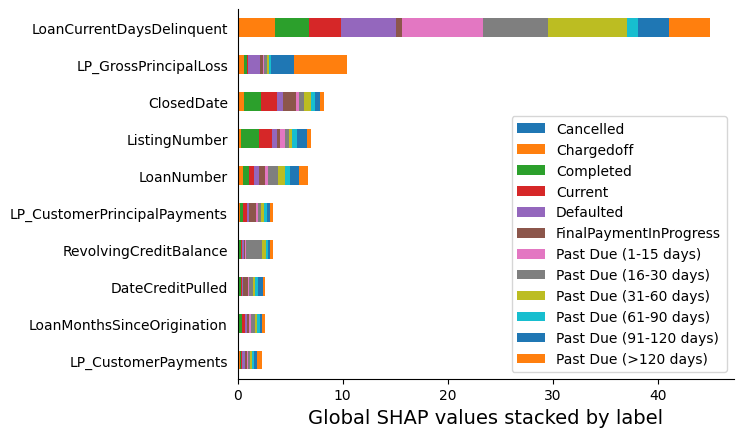
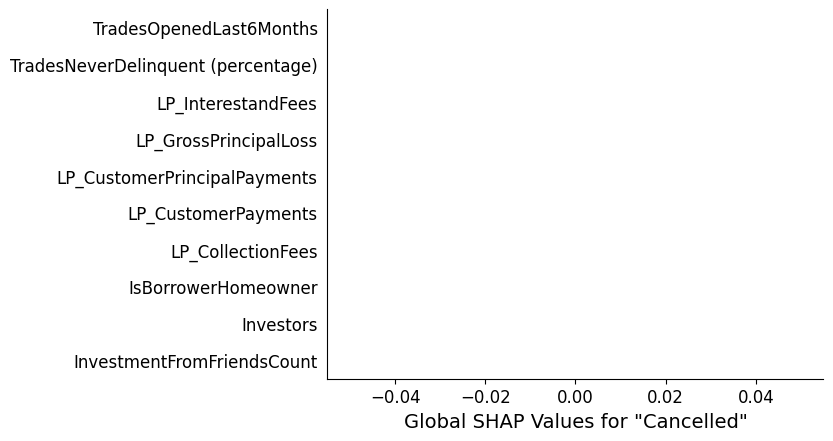
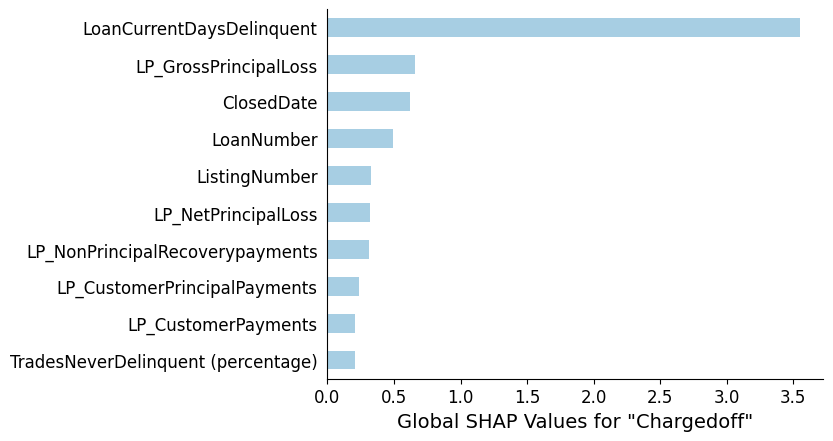
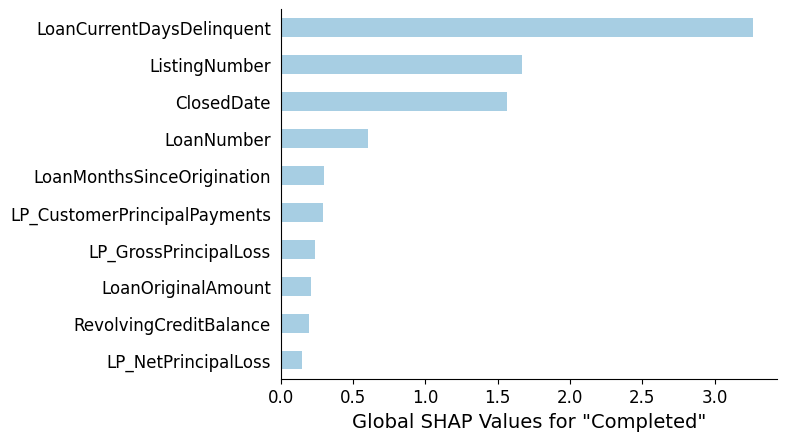
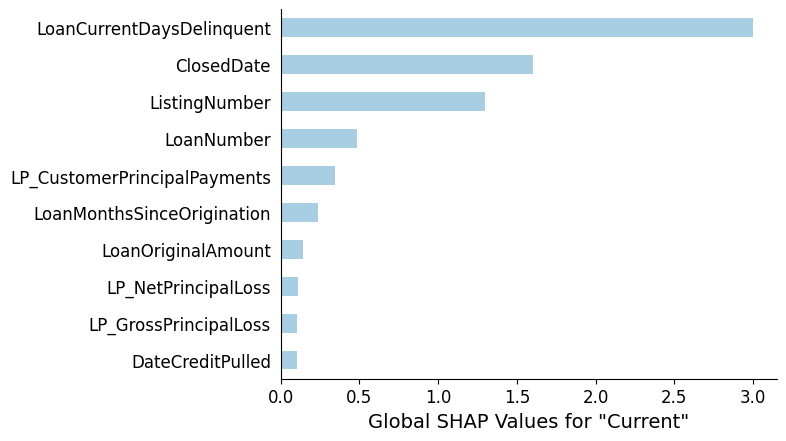
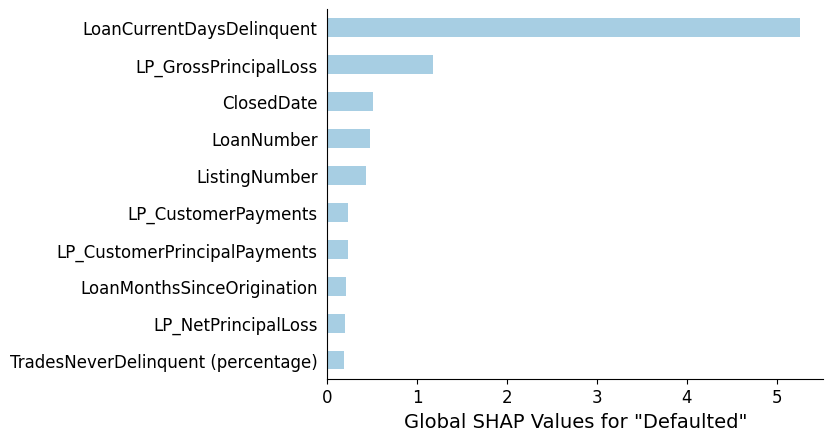
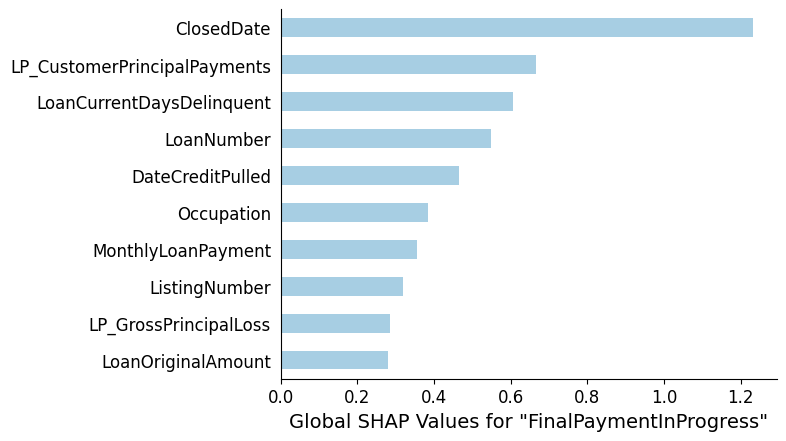
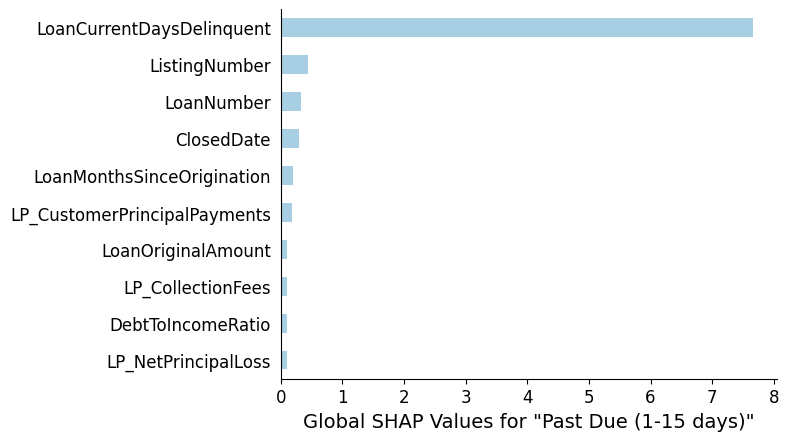
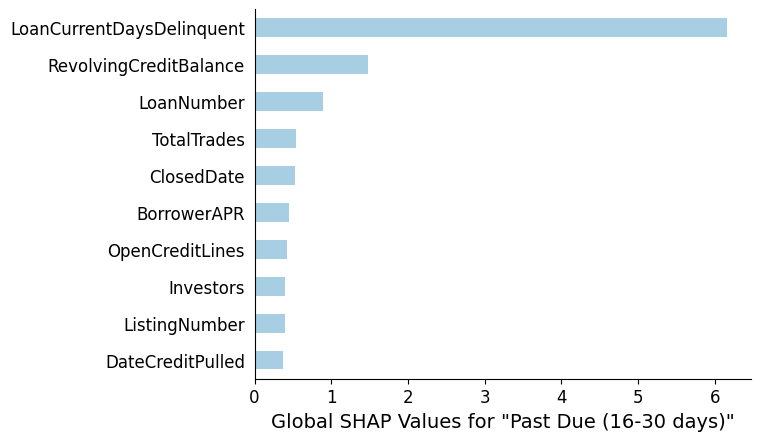
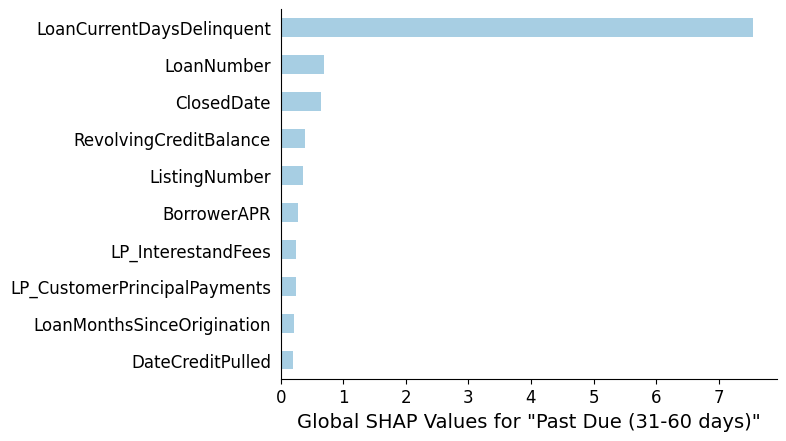
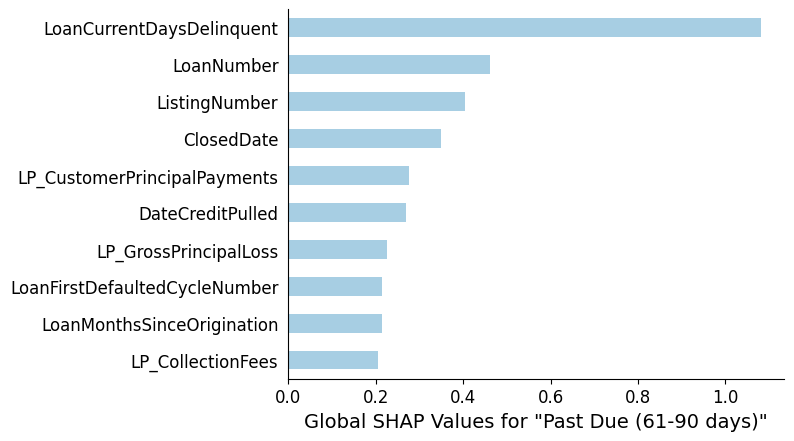
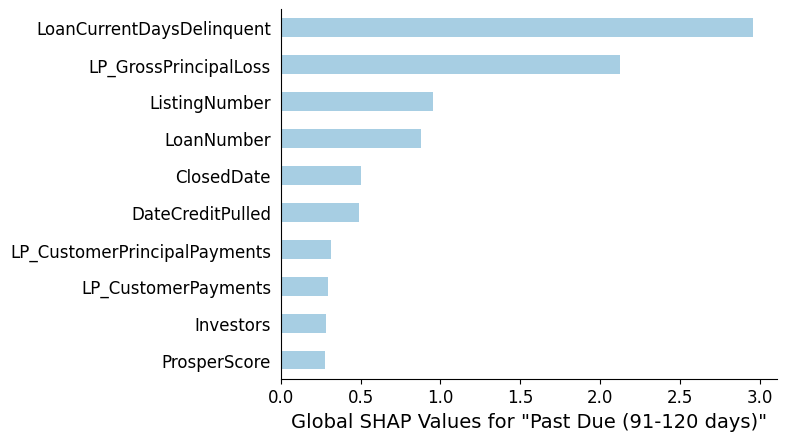
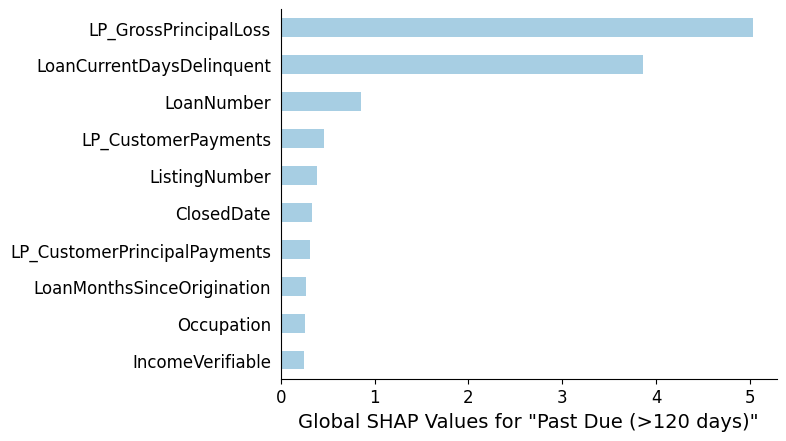

In [65]:
# show explainability report
show_s3_html("s3://sagemaker-us-east-1-122538140147/sgm-output/Score/documentation/explainability/output/Score-t7-1-1591c906633345949128fde5ee8d1f0d03d68b6bbe394dc2b777/report.html")


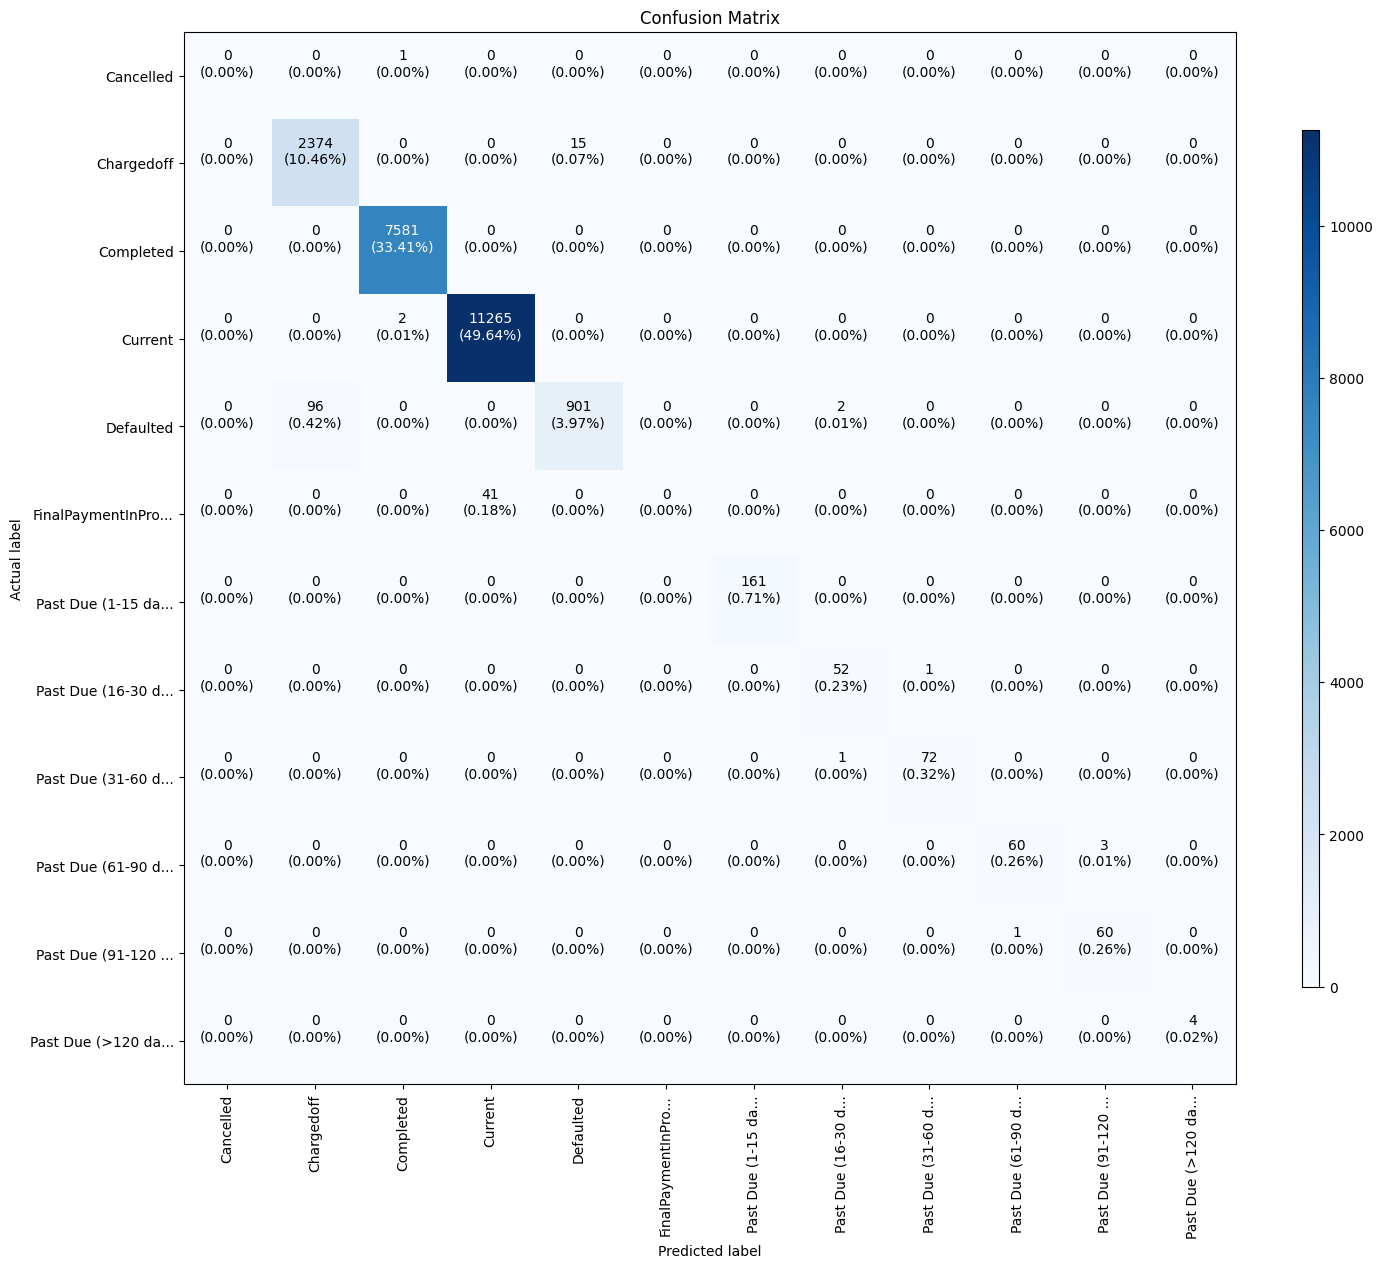

In [66]:
# show model insights report
show_s3_html('s3://sagemaker-us-east-1-122538140147/sgm-output/Score/documentation/model_monitor/output/WeightedEnsemble-L2-FULL-t7122538140147Score/report.html')

In [67]:
# get the model container
model_container = response['BestCandidate']['InferenceContainers'][0]['Image']
model_container

'763104351884.dkr.ecr.us-east-1.amazonaws.com/autogluon-inference:0.4.3-cpu-py38-ubuntu20.04'

In [68]:
# get the model s3 uri files
model_s3_uri = response['BestCandidate']['InferenceContainers'][0]['ModelDataUrl']
model_s3_uri

's3://sagemaker-us-east-1-122538140147/sgm-output/Score/sagemaker-automl-candidates/model/WeightedEnsemble-L2-FULL-t7/model.tar.gz'

In [69]:
from sagemaker.model import Model

In [71]:
# create a model
model = Model(image_uri=model_container, 
              model_data=model_s3_uri, 
              role=role)

In [72]:
endpoint_name='loan'

In [73]:
# deploy the model to an endpoint to use it for predictions
model.deploy(initial_instance_count=1,
    instance_type='ml.m4.xlarge',
    endpoint_name=endpoint_name)

----------!

In [74]:
# connect to the endpoint
predictor = sagemaker.predictor.Predictor(endpoint_name)

In [75]:
# get data from the endpoint and get the predicted value
import json
content_type = "text/csv"

def query_endpoint(encoded_tabular_data):
    """Get endpoint reponse"""
    client = boto3.Session().client('sagemaker-runtime')
    response = client.invoke_endpoint(
        EndpointName=endpoint_name, ContentType=content_type, Body=encoded_tabular_data
    )
    return response


def parse_resonse(query_response):
    """Convert the reponse body to string/number"""
    prediction = json.loads(query_response["Body"].read())
    return prediction

In [76]:
# split test data into features and the real label
ground_truth_label, features = test_data.iloc[:, 5], test_data.iloc[:, :5]

In [77]:
# get the prediction for the first row to test the connectivity to the endpoint
query_response = query_endpoint(features.iloc[:1].to_csv(header=False, index=False).encode("utf-8"))
model_prediction = parse_resonse(query_response)

ModelError: An error occurred (ModelError) when calling the InvokeEndpoint operation: Received server error (503) from primary with message "{
  "code": 503,
  "type": "InternalServerException",
  "message": "Prediction failed"
}
". See https://us-east-1.console.aws.amazon.com/cloudwatch/home?region=us-east-1#logEventViewer:group=/aws/sagemaker/Endpoints/loan in account 122538140147 for more information.

In [78]:
# endpoint response
query_response

NameError: name 'query_response' is not defined

In [79]:
# compare the prediction with the real value
model_prediction, ground_truth_label.values[0]

NameError: name 'model_prediction' is not defined

In [80]:
# get predictions for all rows in the testing data
result = []
for row in range(features.shape[0]):
    query_response = query_endpoint(features.iloc[row:row+1].to_csv(header=False, index=False).encode("utf-8"))
    model_prediction = parse_resonse(query_response)
    result.append(model_prediction)

ModelError: An error occurred (ModelError) when calling the InvokeEndpoint operation: Received server error (503) from primary with message "{
  "code": 503,
  "type": "InternalServerException",
  "message": "Prediction failed"
}
". See https://us-east-1.console.aws.amazon.com/cloudwatch/home?region=us-east-1#logEventViewer:group=/aws/sagemaker/Endpoints/loan in account 122538140147 for more information.

In [81]:
# create testing dataframe to add the results
testing_model = test_data.copy()

In [82]:
testing_model['predicted_val'] = result

ValueError: Length of values (0) does not match length of index (500)

In [83]:
# show data
testing_model.head()

ListingNumber  Term  BorrowerAPR  BorrowerRate  LenderYield  \
113437         238858    36      0.10421        0.0973       0.0873   
113438            363    36      0.08684        0.0800       0.0700   
113439         820431    60      0.20593        0.1819       0.1719   
113440         363060    36      0.37453        0.3500       0.3400   
113441         508082    36      0.12400        0.1029       0.0929   

        ProsperScore  ListingCategory (numeric)  EmploymentStatusDuration  \
113437           4.0                          0                      27.0   
113438           4.0                          0                       0.0   
113439           6.0                          1                      77.0   
113440           4.0                          1                      19.0   
113441           9.0                          6                      92.0   

        CreditScoreRangeLower  CreditScoreRangeUpper  CurrentCreditLines  \
113437                  720.0                  739.0                11.0   
113438                  680.0                  699.0                 8.0   
113439                  700.0                  719.0                10.0   
113440                  660.0                  679.0                12.0   
113441                  720.0                  739.0                15.0   

        OpenCreditLines  TotalCreditLinespast7years  OpenRevolvingAccounts  \
113437              9.0                        14.0                      7   
113438              7.0                        21.0                      0   
113439              7.0                        22.0                      6   
113440             11.0                        34.0                      9   
113441             15.0                        27.0                     14   

        OpenRevolvingMonthlyPayment  InquiriesLast6Months  TotalInquiries  \
113437                        280.0                   1.0             8.0   
113438                          0.0                   0.0             2.0   
113439                        334.0                   0.0             2.0   
113440                        219.0                   0.0             0.0   
113441                        216.0                   0.0             5.0   

        CurrentDelinquencies  AmountDelinquent  DelinquenciesLast7Years  \
113437                   0.0               0.0                      1.0   
113438                   0.0               0.0                      0.0   
113439                   0.0               0.0                      0.0   
113440                   1.0               0.0                      0.0   
113441                   0.0               0.0                      0.0   

        PublicRecordsLast10Years  PublicRecordsLast12Months  \
113437                       0.0                        0.0   
113438                       0.0                        0.0   
113439                       0.0                        0.0   
113440                       1.0                        0.0   
113441                       0.0                        0.0   

        RevolvingCreditBalance  BankcardUtilization  AvailableBankcardCredit  \
113437                  9003.0                 0.38                  14297.0   
113438                     0.0                 0.00                      0.0   
113439                 15218.0                 0.63                   8882.0   
113440                  7815.0                 0.88                    860.0   
113441                  3159.0                 0.09                  31591.0   

        TotalTrades  TradesNeverDelinquent (percentage)  \
113437         14.0                                0.92   
113438         17.0                                1.00   
113439         22.0                                0.90   
113440         29.0                                0.79   
113441         27.0                                1.00   

        TradesOpenedLast6Months  DebtToIncomeRatio  StatedMonth

In [ ]:
# plot the three lines of the original values vs the predicted values
testing_model.set_index('datetime',drop=True).iloc[400:,4:].plot(figsize=(25,5))
plt.xlabel("Date & time")
plt.ylabel("PM10")
plt.title("Actual (raw data) of the Low-End Sensor, the High-End PM10 vs predicted PM10 of the model")
plt.legend(["low_pm10", "hi_pm10", 'predicted_pm10'])
plt.show()